<a href="https://colab.research.google.com/github/paulAnalytics/GenAIforBusinessIntelligence/blob/main/Dataiku_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformation and Predictive Modelling

In [120]:
import pandas as pd

In [121]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

In [122]:
columns = [
    "age",
    "class_of_worker",
    "detailed_industry_recode",
    "detailed_occupation_recode",
    "education",
    "wage_per_hour",
    "enroll_in_edu_inst_last_wk",
    "marital_stat",
    "major_industry_code",
    "major_occupation_code",
    "race",
    "hispanic_origin",
    "sex",
    "member_of_a_labor_union",
    "reason_for_unemployment",
    "full_or_part_time_employment_stat",
    "capital_gains",
    "capital_losses",
    "dividends_from_stocks",
    "tax_filer_stat",
    "region_of_previous_residence",
    "state_of_previous_residence",
    "detailed_household_and_family_stat",
    "detailed_household_summary_in_household",
    "instance_weight",
    "migration_code_change_in_msa",
    "migration_code_change_in_reg",
    "migration_code_move_within_reg",
    "live_in_this_house_1_year_ago",
    "migration_prev_res_in_sunbelt",
    "num_persons_worked_for_employer",
    "family_members_under_18",
    "country_of_birth_father",
    "country_of_birth_mother",
    "country_of_birth_self",
    "citizenship",
    "own_business_or_self_employed",
    "fill_inc_questionnaire_for_veterans_admin",
    "veterans_benefits",
    "weeks_worked_in_year",
    "year",
    "Target"
]

In [123]:
# Loading the data

df_income_learn = pd.read_csv('census_income_learn.csv', header = None, names = columns)

In [124]:
df_income_learn.shape

(199523, 42)

In [125]:
df_income_learn['Target'].value_counts()

Target
 - 50000.    187141
 50000+.      12382
Name: count, dtype: int64

In [126]:
df_income_learn.describe()

age  detailed_industry_recode  detailed_occupation_recode  \
count  199523.000000             199523.000000               199523.000000   
mean       34.494199                 15.352320                   11.306556   
std        22.310895                 18.067129                   14.454204   
min         0.000000                  0.000000                    0.000000   
25%        15.000000                  0.000000                    0.000000   
50%        33.000000                  0.000000                    0.000000   
75%        50.000000                 33.000000                   26.000000   
max        90.000000                 51.000000                   46.000000   

       wage_per_hour  capital_gains  capital_losses  dividends_from_stocks  \
count  199523.000000   199523.00000   199523.000000          199523.000000   
mean       55.426908      434.71899       37.313788             197.529533   
std       274.896454     4697.53128      271.896428            1984.163658   
min         0.000000        0.00000        0.000000               0.000000   
25%         0.000000        0.00000        0.000000               0.000000   
50%         0.000000        0.00000        0.000000               0.000000   
75%         0.000000        0.00000        0.000000               0.000000   
max      9999.000000    99999.00000     4608.000000           99999.000000   

       instance_weight  num_persons_worked_for_employer  \
count    199523.000000                    199523.000000   
mean       1740.380269                         1.956180   
std         993.768156                         2.365126   
min          37.870000                         0.000000   
25%        1061.615000                         0.000000   
50%        1618.310000                         1.000000   
75%        2188.610000                         4.000000   
max       18656.300000                         6.000000   

       own_business_or_self_employed  veterans_benefits  weeks_worked_in_year  \
count                  199523.000000      199523.000000         199523.000000   
mean                        0.175438           1.514833             23.174897   
std                         0.553694           0.851473             24.411488   
min                         0.000000           0.000000              0.000000   
25%                         0.000000           2.000000              0.000000   
50%                         0.000000           2.000000              8.000000   
75%                         0.000000           2.000000             52.000000   
max                         2.000000           2.000000             52.000000   

                year  
count  199523.000000  
mean       94.499672  
std         0.500001  
min        94.000000  
25%        94.000000  
50%        94.000000  
75%        95.000000  
max        95.000000

In [127]:
df_income_learn.head(5)

age                  class_of_worker  detailed_industry_recode  \
0   73                  Not in universe                         0   
1   58   Self-employed-not incorporated                         4   
2   18                  Not in universe                         0   
3    9                  Not in universe                         0   
4   10                  Not in universe                         0   

   detailed_occupation_recode                    education  wage_per_hour  \
0                           0         High school graduate              0   
1                          34   Some college but no degree              0   
2                           0                   10th grade              0   
3                           0                     Children              0   
4                           0                     Children              0   

  enroll_in_edu_inst_last_wk    marital_stat           major_industry_code  \
0            Not in universe         Widowed   Not in universe or children   
1            Not in universe        Divorced                  Construction   
2                High school   Never married   Not in universe or children   
3            Not in universe   Never married   Not in universe or children   
4            Not in universe   Never married   Not in universe or children   

                  major_occupation_code                        race  \
0                       Not in universe                       White   
1   Precision production craft & repair                       White   
2                       Not in universe   Asian or Pacific Islander   
3                       Not in universe                       White   
4                       Not in universe                       White   

  hispanic_origin      sex member_of_a_labor_union reason_for_unemployment  \
0       All other   Female         Not in universe         Not in universe   
1       All other     Male         Not in universe         Not in universe   
2       All other   Female         Not in universe         Not in universe   
3       All other   Female         Not in universe         Not in universe   
4       All other   Female         Not in universe         Not in universe   

  full_or_part_time_employment_stat  capital_gains  capital_losses  \
0                Not in labor force              0               0   
1          Children or Armed Forces              0               0   
2                Not in labor force              0               0   
3          Children or Armed Forces              0               0   
4          Children or Armed Forces              0               0   

   dividends_from_stocks      tax_filer_stat region_of_previous_residence  \
0                      0            Nonfiler              Not in universe   
1                      0   Head of household                        South   
2                      0            Nonfiler              Not in universe   
3                      0            Nonfiler              Not in universe   
4                      0            Nonfiler              Not in universe   

  state_of_previous_residence         detailed_household_and_family_stat  \
0             Not in universe   Other Rel 18+ ever marr not in subfamily   
1                    Arkansas                                Householder   
2             Not in universe    Child 18+ never marr Not in a subfamily   
3             Not in universe      Child <18 never marr not in subfamily   
4             Not in universe      Child <18 never marr not in subfamily   

  detailed_household_summary_in_household  instance_weight  \
0           Other relative of householder          1700.09   
1                             Householder          1053.55   
2                       Child 18 or older           991.95   
3            Child under 18 never married          1758.14   
4            Child under 18 never married          1069.16   

  migration_code_change_in_msa migration_code_

In [128]:

# Loop through each column and print unique values
for column in df_income_learn.columns:
    unique_values = df_income_learn[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()  # Add a blank line for better readability

Unique values in 'age':
[73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2
  1 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50
 24 17 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75
 44 59 60 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]

Unique values in 'class_of_worker':
[' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']

Unique values in 'detailed_industry_recode':
[ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5
 11  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21
 28 20 51 10]

Unique values in 'detailed_occupation_recode':
[ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13
 18  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46]

Unique values in 'education':
[' High school graduate' ' Some college b

## Data Cleaning

In [129]:
# Drop instance weight column as metadata suggesed

df_income_learn.drop(columns=['instance_weight'], inplace=True)

In [130]:
# Drop Columns with '?' in the migration_code_move_within_reg

c = df_income_learn[df_income_learn['migration_code_move_within_reg'] == ' ?']

In [131]:
c['Target'].value_counts()

Target
 - 50000.    93153
 50000+.      6543
Name: count, dtype: int64

In [132]:
# Drop Columns with '?' migration_code_change_in_reg

b = df_income_learn[df_income_learn['migration_code_change_in_reg'] == ' ?']

In [133]:
b['Target'].value_counts()

Target
 - 50000.    93153
 50000+.      6543
Name: count, dtype: int64

In [134]:
# Come back here to do some averaging or something

In [135]:
# Drop Columns with '?' migration_code_move_within_reg

a = df_income_learn[df_income_learn['migration_code_move_within_reg'] == ' ?']

In [136]:
a['Target'].value_counts()

Target
 - 50000.    93153
 50000+.      6543
Name: count, dtype: int64

In [137]:
#come back to do something about these missing values
# Need to find out if these values are missing completely at random

In [138]:
# Replace '?' with the most frequent value for each column, Come back to check for type of missigness, and maybe try deleting the rows to see how your model will react
columns_to_replace = ['migration_code_move_within_reg', 'migration_code_change_in_reg', 'migration_code_move_within_reg', 'migration_code_change_in_msa', 'migration_prev_res_in_sunbelt']
most_frequent = 0

for col in columns_to_replace:
    most_frequent = df_income_learn[df_income_learn[col] != ' ?'][col].mode()[0]
    df_income_learn[col] = df_income_learn[col].replace(' ?', most_frequent)

print(most_frequent)

 Not in universe


In [139]:
# Looking at columns with Nana

In [140]:
# List of columns to check for NaNs
columns_to_check = [
    'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer',
    'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother',
    'country_of_birth_self', 'citizenship', 'own_business_or_self_employed',
    'fill_inc_questionnaire_for_veterans_admin', 'veterans_benefits', 'weeks_worked_in_year',
    'year', 'Target'
]

# Function to create DataFrame for NaN values and perform value count by 'Target' column
def nan_value_counts_by_target(df, columns):
    result = {}
    for col in columns:
        nan_df = df[df[col].isna()]
        if not nan_df.empty:
            value_counts = nan_df['Target'].value_counts(dropna=False)
            result[col] = value_counts
    return result

# Get value counts for columns with NaNs
nan_value_counts = nan_value_counts_by_target(df_income_learn, columns_to_check)

# Print the result
for col, counts in nan_value_counts.items():
    print(f"Column: {col}")
    print(counts)
    print()


In [141]:
# Identify missing values another sanity check

# Check for missing values in each column
missing_values = df_income_learn.isnull().sum()

# Display columns with missing values
missing_values = missing_values[missing_values > 0]

missing_values.head()


Series([], dtype: int64)

In [142]:
# Identify duplicates
duplicates = df_income_learn[df_income_learn.duplicated(keep=False)]
duplicates.head()

age   class_of_worker  detailed_industry_recode  \
0    73   Not in universe                         0   
3     9   Not in universe                         0   
4    10   Not in universe                         0   
10    8   Not in universe                         0   
15   13   Not in universe                         0   

    detailed_occupation_recode              education  wage_per_hour  \
0                            0   High school graduate              0   
3                            0               Children              0   
4                            0               Children              0   
10                           0               Children              0   
15                           0               Children              0   

   enroll_in_edu_inst_last_wk    marital_stat           major_industry_code  \
0             Not in universe         Widowed   Not in universe or children   
3             Not in universe   Never married   Not in universe or children   
4             Not in universe   Never married   Not in universe or children   
10            Not in universe   Never married   Not in universe or children   
15            Not in universe   Never married   Not in universe or children   

   major_occupation_code    race hispanic_origin      sex  \
0        Not in universe   White       All other   Female   
3        Not in universe   White       All other   Female   
4        Not in universe   White       All other   Female   
10       Not in universe   White       All other   Female   
15       Not in universe   Black       All other   Female   

   member_of_a_labor_union reason_for_unemployment  \
0          Not in universe         Not in universe   
3          Not in universe         Not in universe   
4          Not in universe         Not in universe   
10         Not in universe         Not in universe   
15         Not in universe         Not in universe   

   full_or_part_time_employment_stat  capital_gains  capital_losses  \
0                 Not in labor force              0               0   
3           Children or Armed Forces              0               0   
4           Children or Armed Forces              0               0   
10          Children or Armed Forces              0               0   
15          Children or Armed Forces              0               0   

    dividends_from_stocks tax_filer_stat region_of_previous_residence  \
0                       0       Nonfiler              Not in universe   
3                       0       Nonfiler              Not in universe   
4                       0       Nonfiler              Not in universe   
10                      0       Nonfiler              Not in universe   
15                      0       Nonfiler              Not in universe   

   state_of_previous_residence         detailed_household_and_family_stat  \
0              Not in universe   Other Rel 18+ ever marr not in subfamily   
3              Not in universe      Child <18 never marr not in subfamily   
4              Not in universe      Child <18 never marr not in subfamily   
10             Not in universe      Child <18 never marr not in subfamily   
15             Not in universe      Child <18 never marr not in subfamily   

   detailed_household_summary_in_household migration_code_change_in_msa  \
0            Other relative of householder                     Nonmover   
3             Child under 18 never married                     Nonmover   
4             Child under 18 never married                     Nonmover   
10            Child under 18 never married                     Nonmover   
15            Child under 18 never married                     Nonmover   

   migration_code_change_in_reg migration_code_move_within_reg  \
0                      Nonmover                       Nonmover   
3                      Nonmover                       Nonmover   
4                      Nonmover                       Nonmover   
10                     Nonmov

In [143]:
duplicates.shape

(53747, 41)

In [144]:
# Remove duplicates
df_income_learn_unique = df_income_learn.drop_duplicates()

In [145]:
df_income_learn_unique.head()

age                  class_of_worker  detailed_industry_recode  \
0   73                  Not in universe                         0   
1   58   Self-employed-not incorporated                         4   
2   18                  Not in universe                         0   
3    9                  Not in universe                         0   
4   10                  Not in universe                         0   

   detailed_occupation_recode                    education  wage_per_hour  \
0                           0         High school graduate              0   
1                          34   Some college but no degree              0   
2                           0                   10th grade              0   
3                           0                     Children              0   
4                           0                     Children              0   

  enroll_in_edu_inst_last_wk    marital_stat           major_industry_code  \
0            Not in universe         Widowed   Not in universe or children   
1            Not in universe        Divorced                  Construction   
2                High school   Never married   Not in universe or children   
3            Not in universe   Never married   Not in universe or children   
4            Not in universe   Never married   Not in universe or children   

                  major_occupation_code                        race  \
0                       Not in universe                       White   
1   Precision production craft & repair                       White   
2                       Not in universe   Asian or Pacific Islander   
3                       Not in universe                       White   
4                       Not in universe                       White   

  hispanic_origin      sex member_of_a_labor_union reason_for_unemployment  \
0       All other   Female         Not in universe         Not in universe   
1       All other     Male         Not in universe         Not in universe   
2       All other   Female         Not in universe         Not in universe   
3       All other   Female         Not in universe         Not in universe   
4       All other   Female         Not in universe         Not in universe   

  full_or_part_time_employment_stat  capital_gains  capital_losses  \
0                Not in labor force              0               0   
1          Children or Armed Forces              0               0   
2                Not in labor force              0               0   
3          Children or Armed Forces              0               0   
4          Children or Armed Forces              0               0   

   dividends_from_stocks      tax_filer_stat region_of_previous_residence  \
0                      0            Nonfiler              Not in universe   
1                      0   Head of household                        South   
2                      0            Nonfiler              Not in universe   
3                      0            Nonfiler              Not in universe   
4                      0            Nonfiler              Not in universe   

  state_of_previous_residence         detailed_household_and_family_stat  \
0             Not in universe   Other Rel 18+ ever marr not in subfamily   
1                    Arkansas                                Householder   
2             Not in universe    Child 18+ never marr Not in a subfamily   
3             Not in universe      Child <18 never marr not in subfamily   
4             Not in universe      Child <18 never marr not in subfamily   

  detailed_household_summary_in_household migration_code_change_in_msa  \
0           Other relative of householder                     Nonmover   
1                             Householder                   MSA to MSA   
2                       Child 18 or older                     Nonmover   
3            Child under 18 never married                     Nonmover   
4            Child under 18 never married        

In [98]:
# what does conflicting instances mean?


In [99]:
## Handle outliers?

## EDA

### Target Variable Analysis

<Axes: xlabel='Target'>

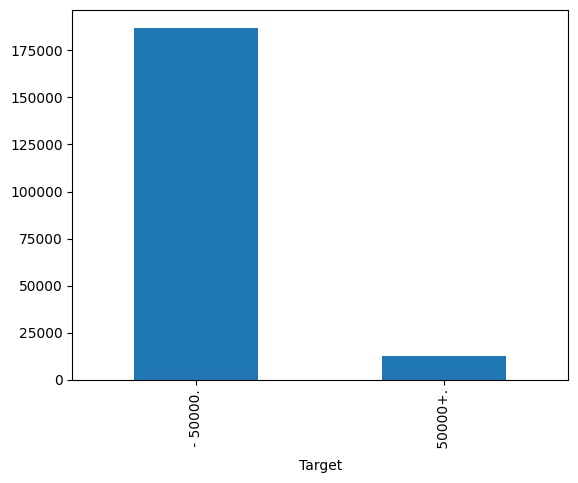

In [100]:
# Target distribution
df_income_learn['Target'].value_counts().plot(kind='bar')


### Univariate Analysis

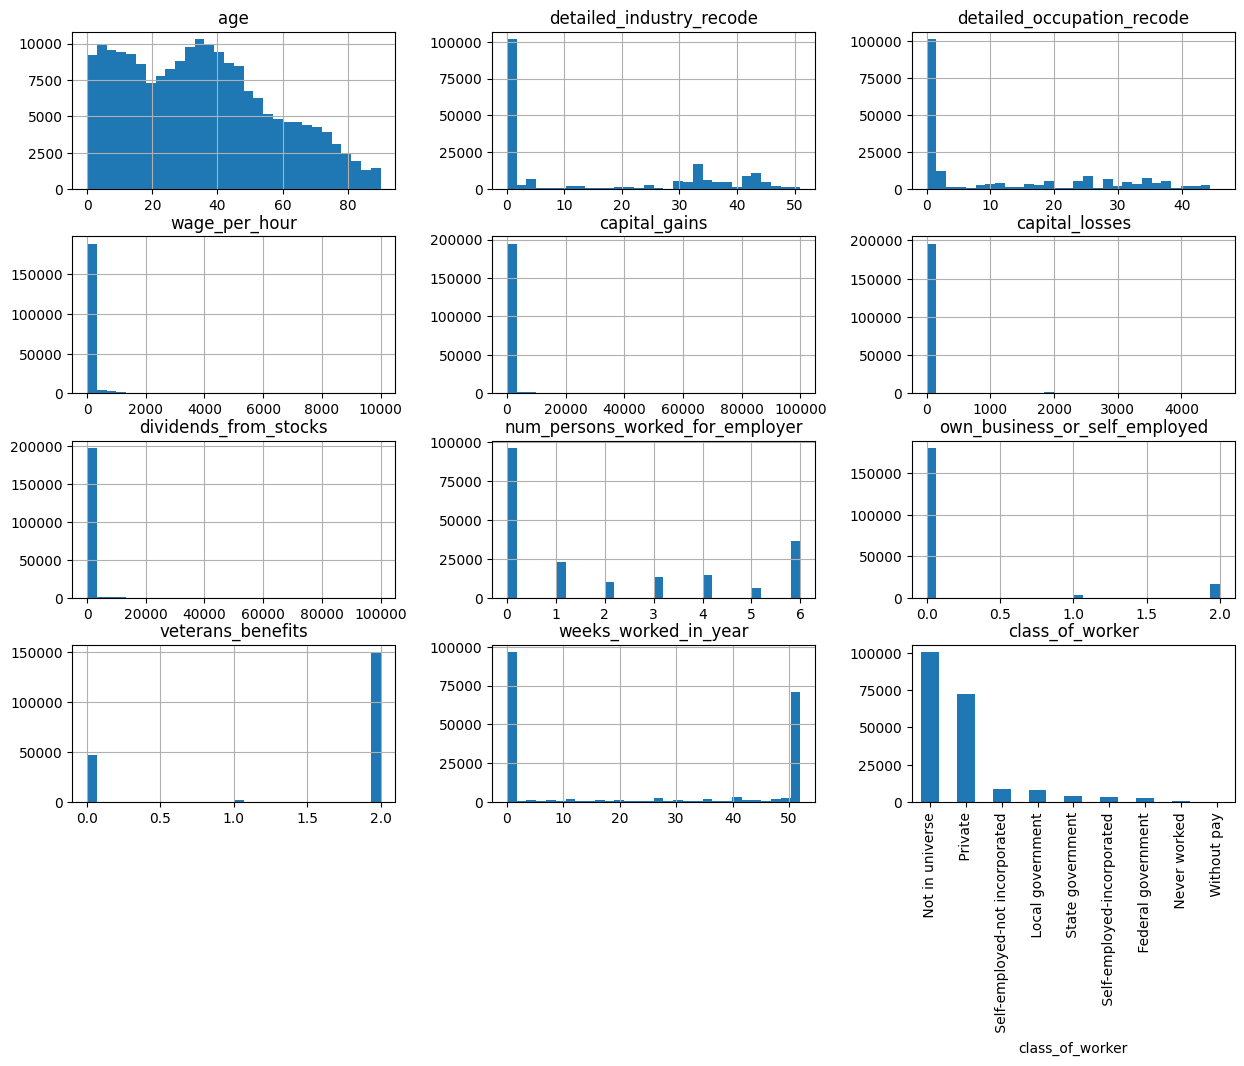

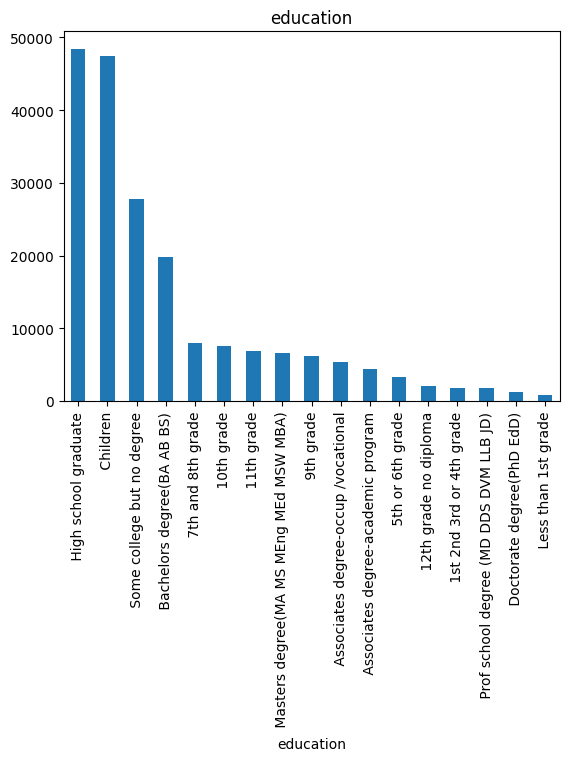

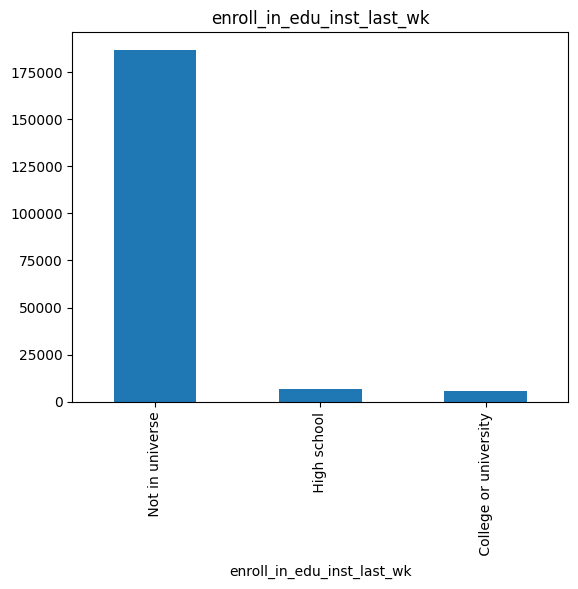

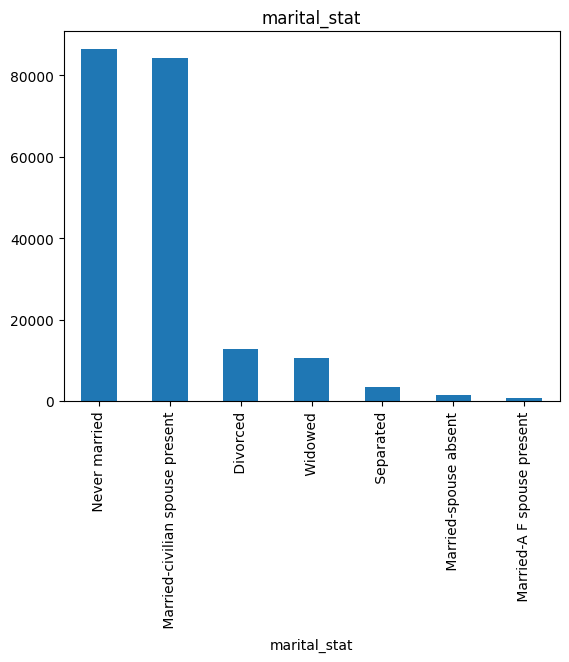

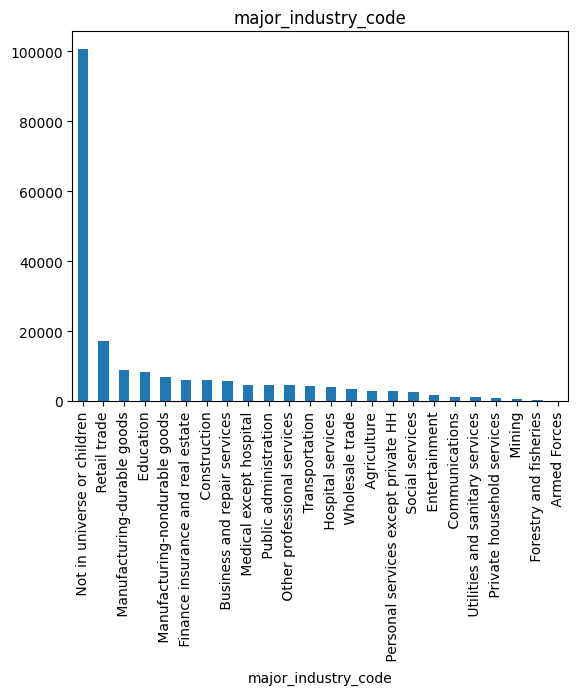

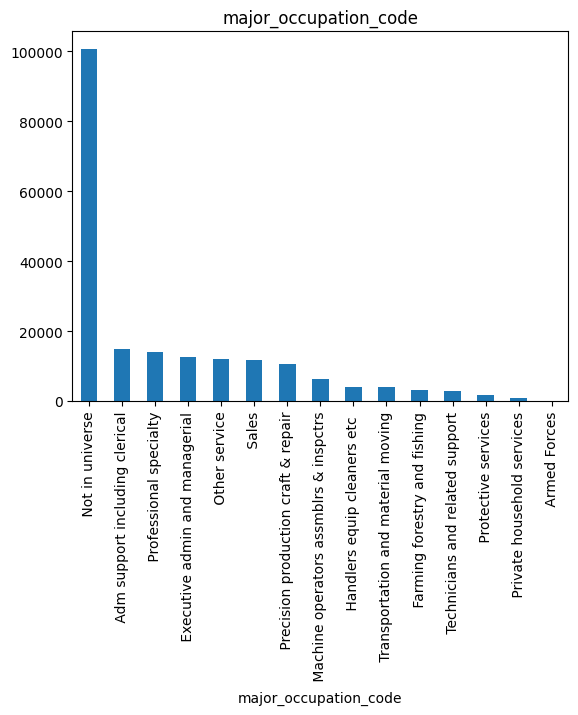

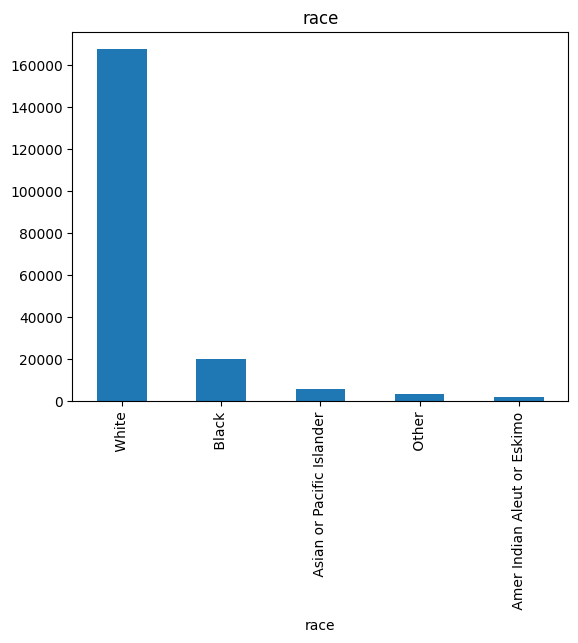

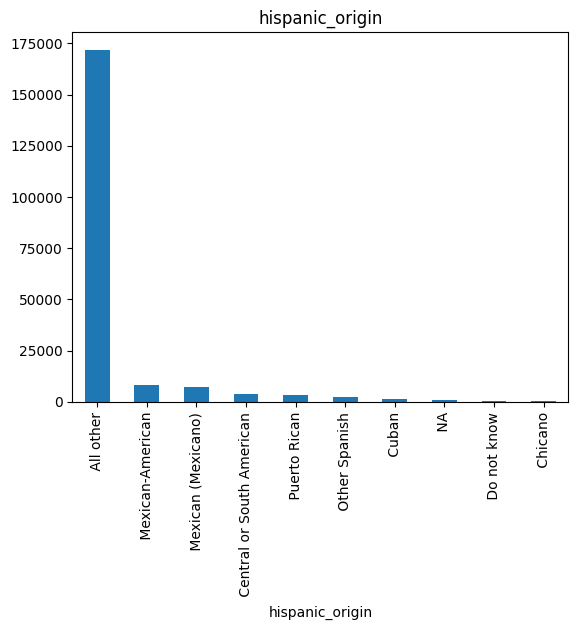

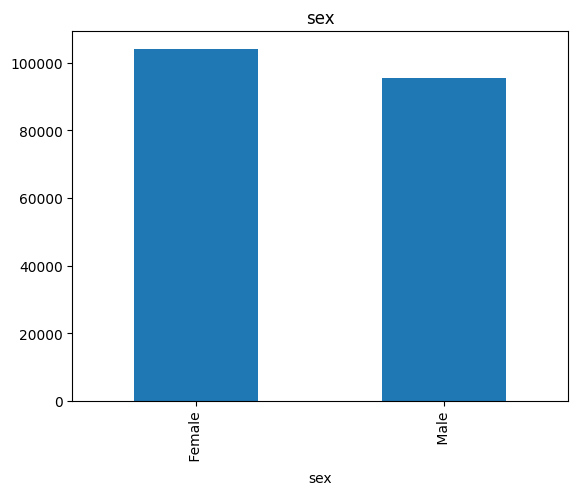

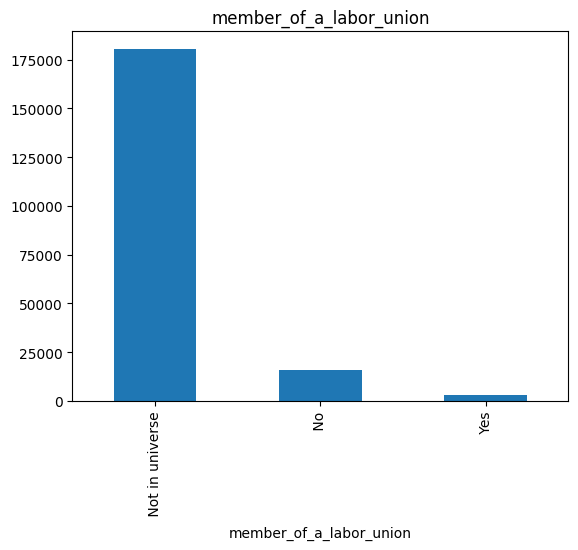

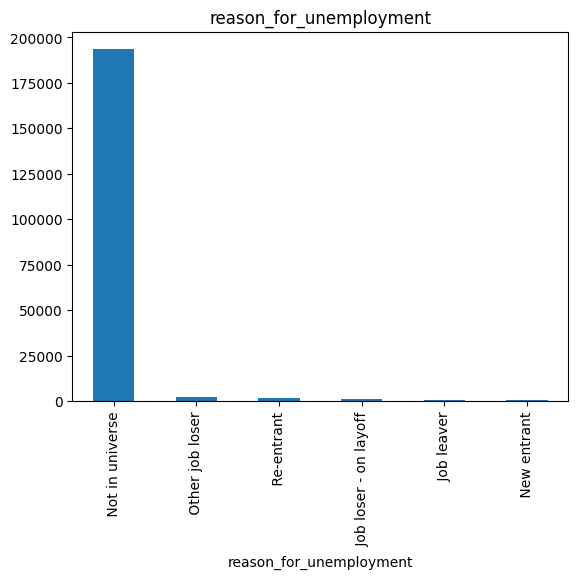

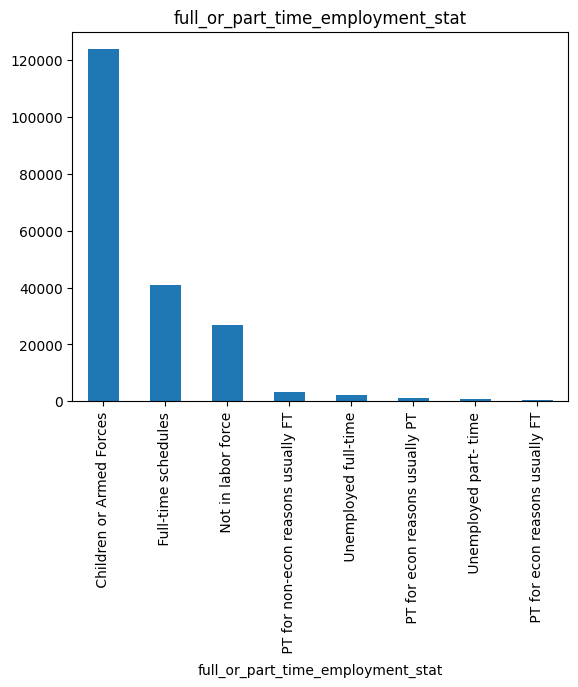

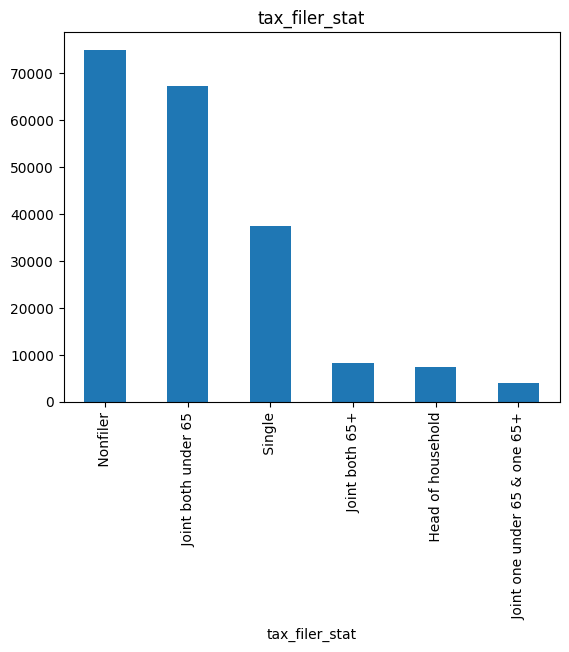

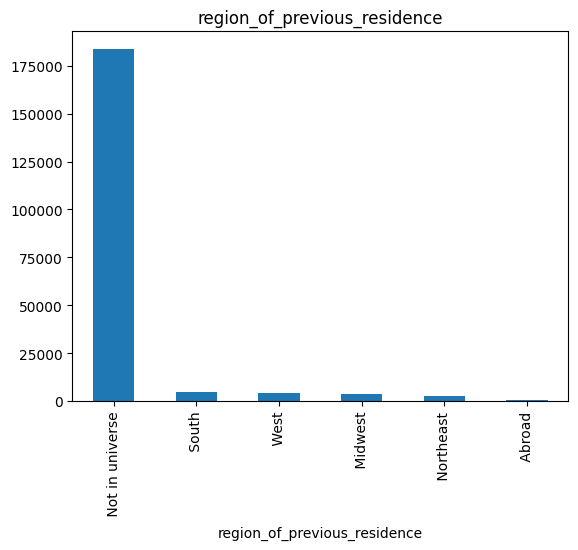

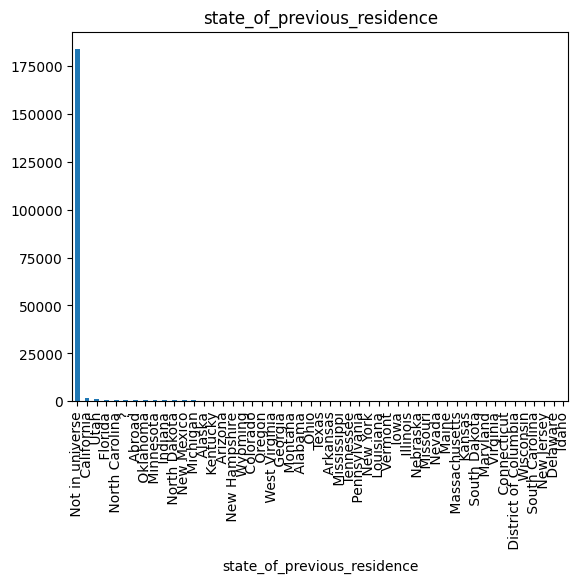

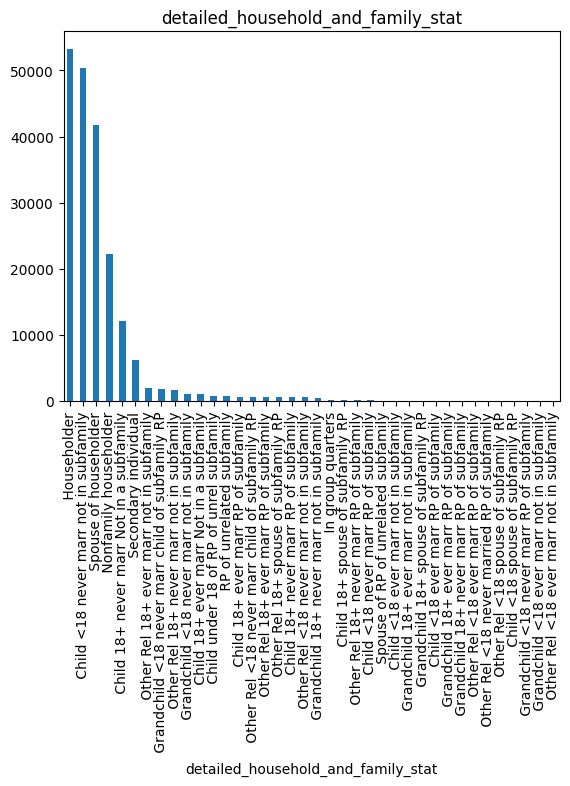

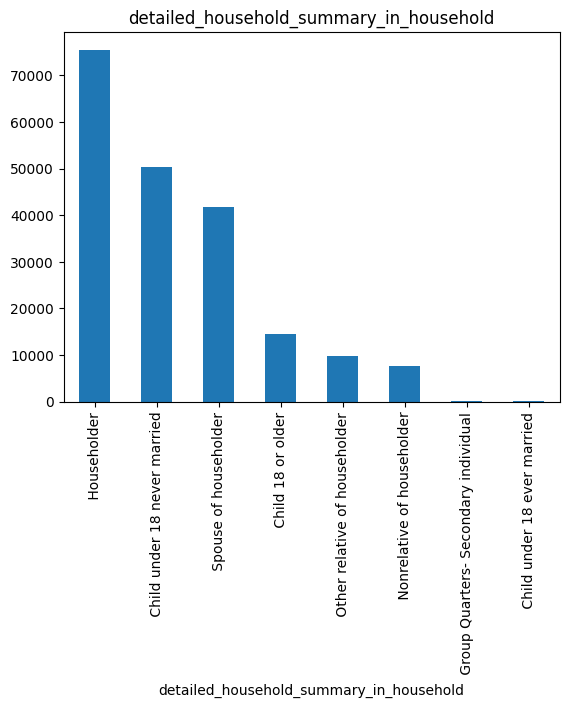

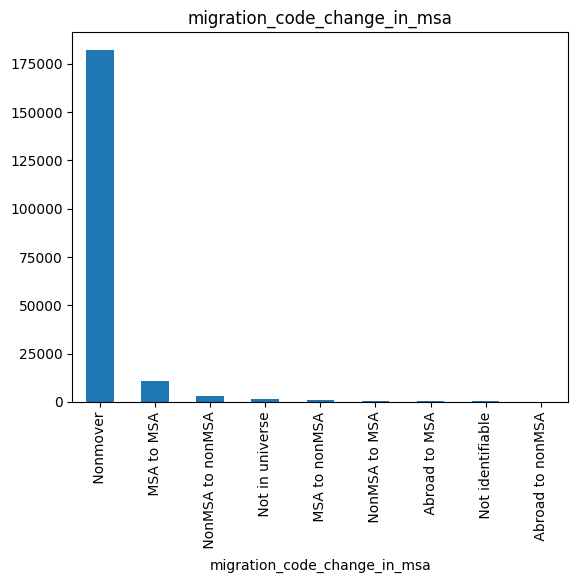

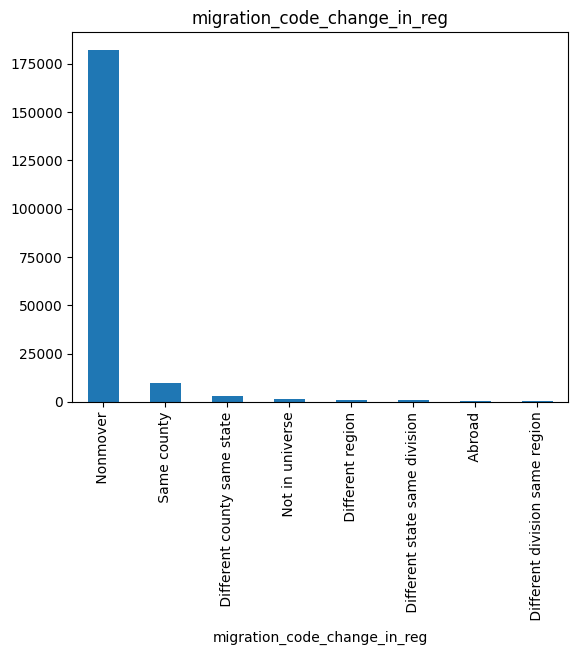

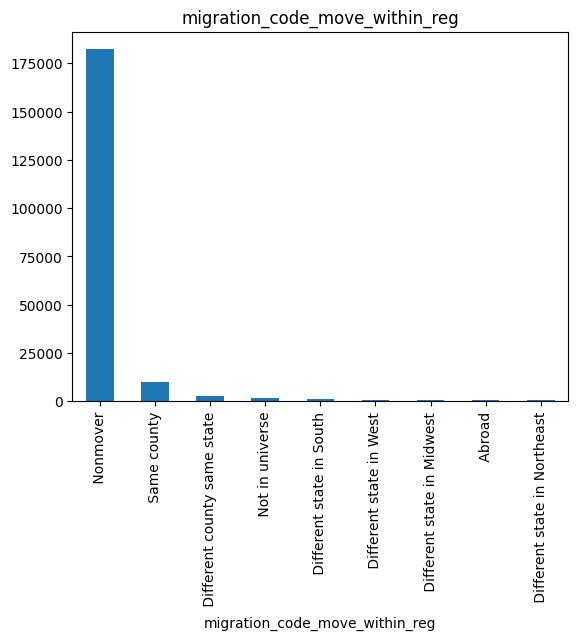

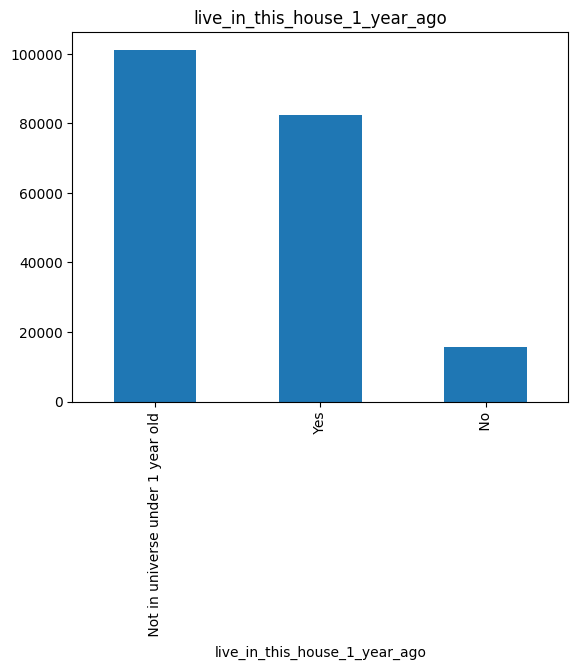

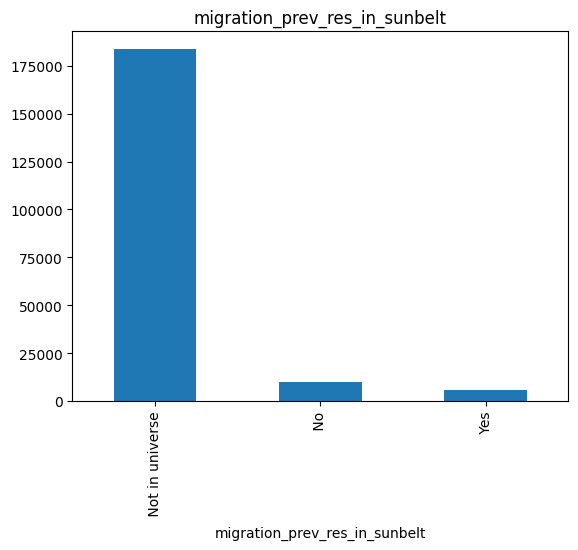

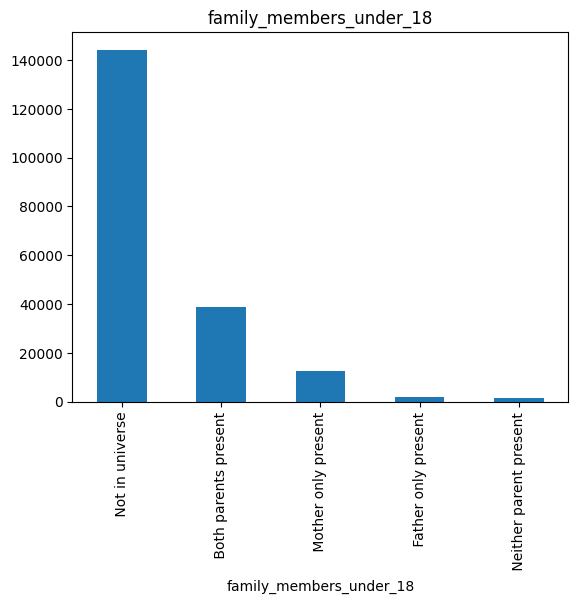

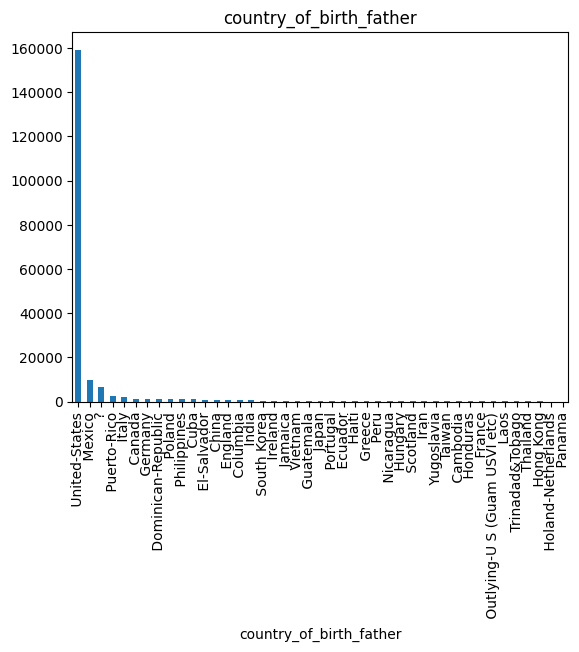

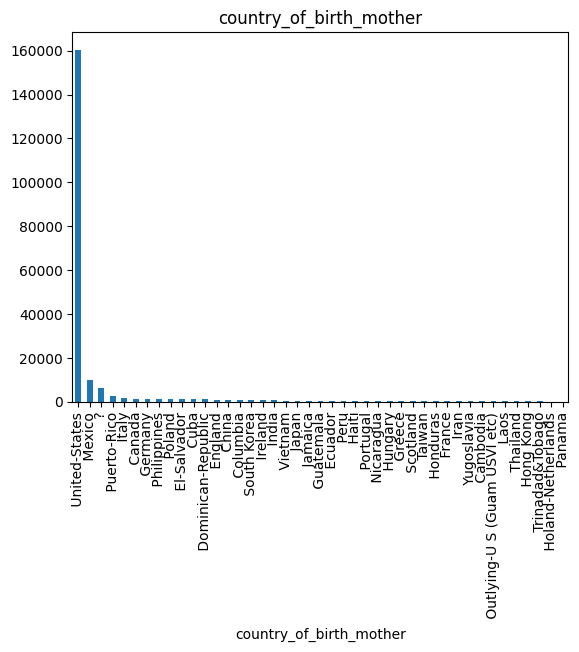

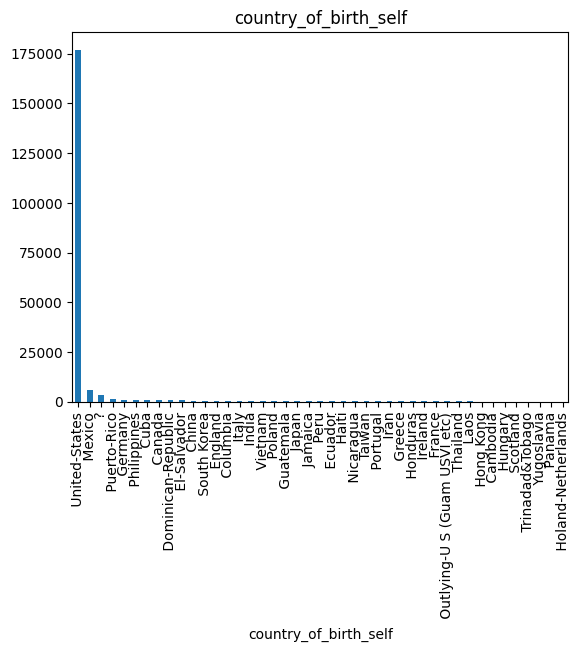

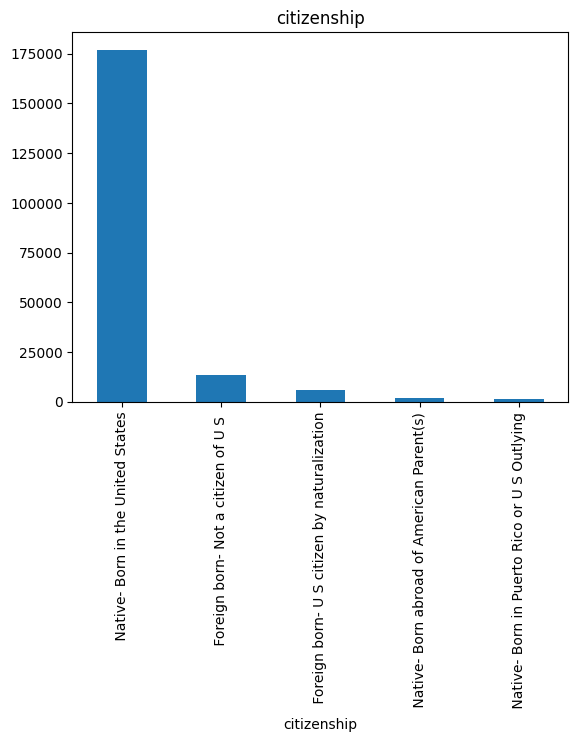

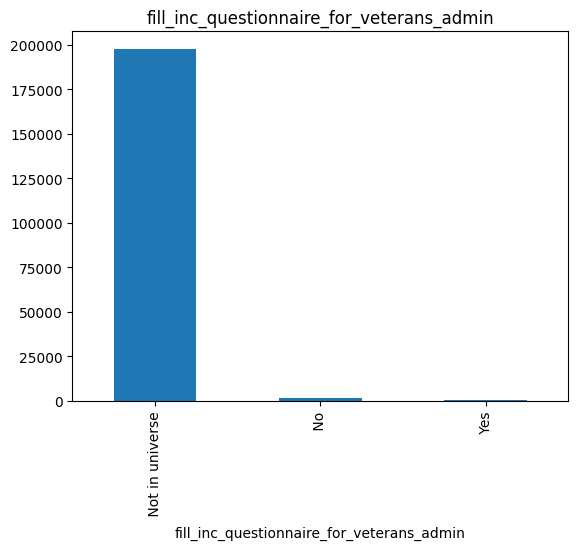

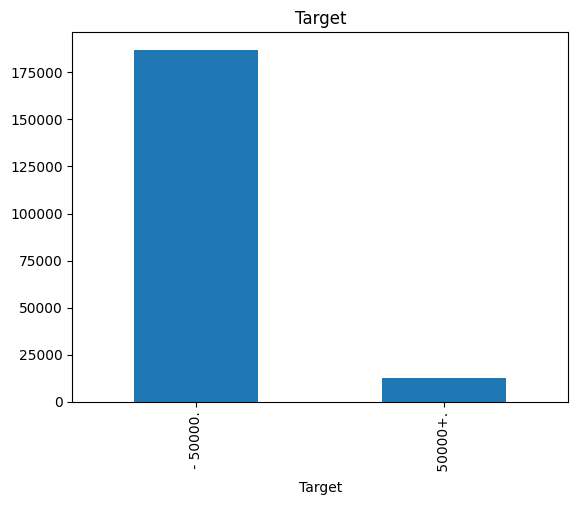

In [101]:
import matplotlib.pyplot as plt

# Histogram for numerical features
df_income_learn.hist(bins=30, figsize=(15, 10))

# Bar plots for categorical features
categorical_features = [col for col in df_income_learn.columns if df_income_learn[col].dtype == 'object']
for col in categorical_features:
    df_income_learn[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


### Bivariate Analysis

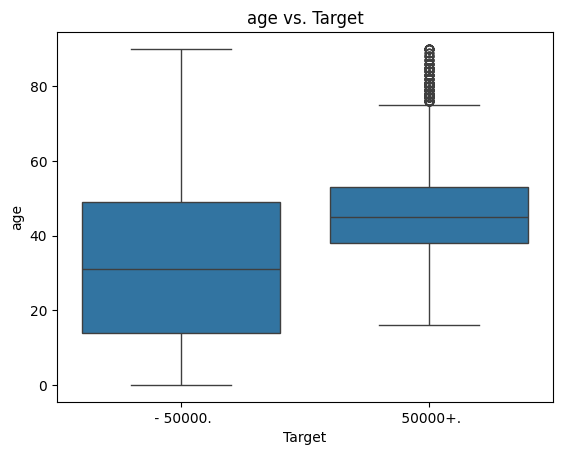

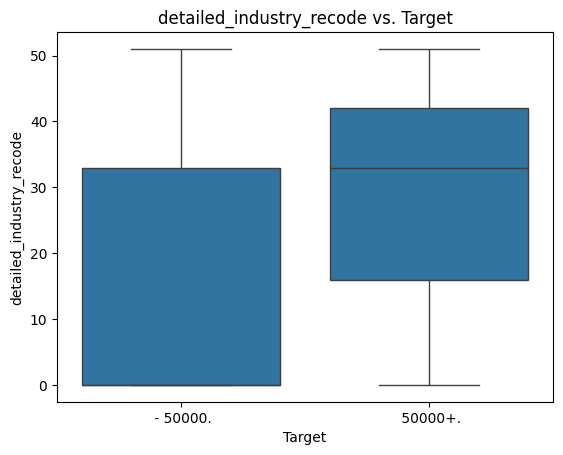

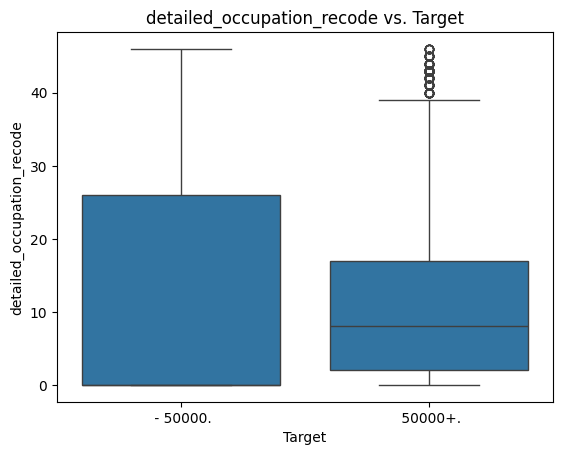

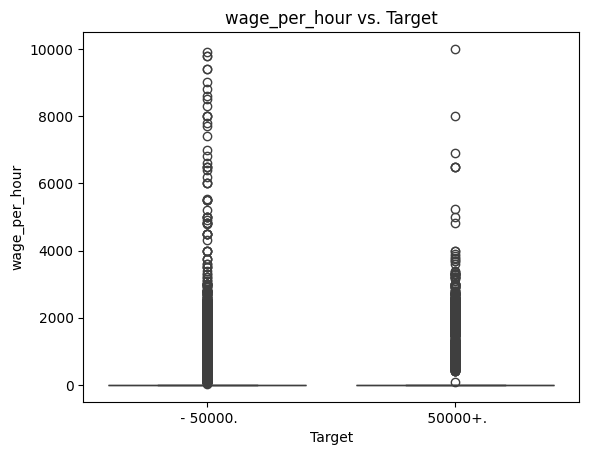

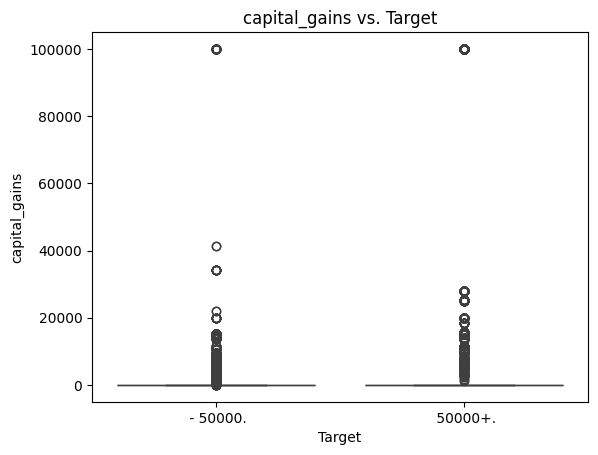

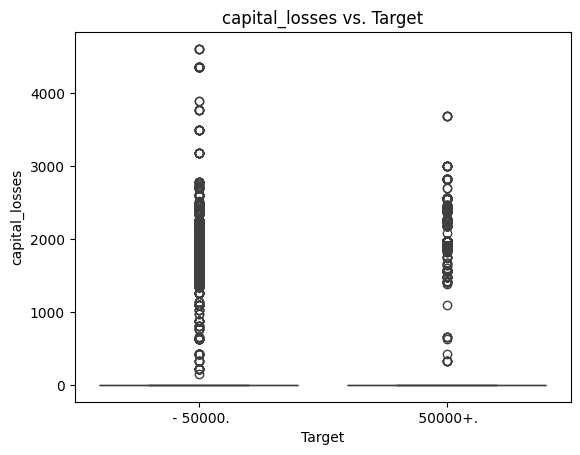

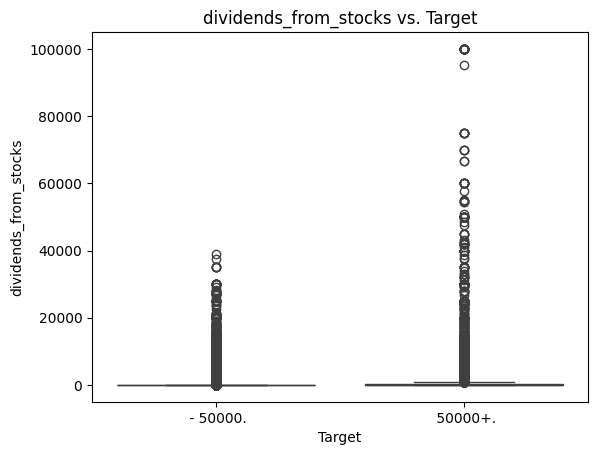

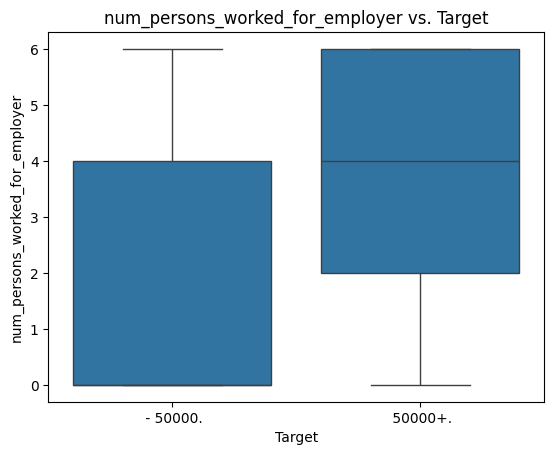

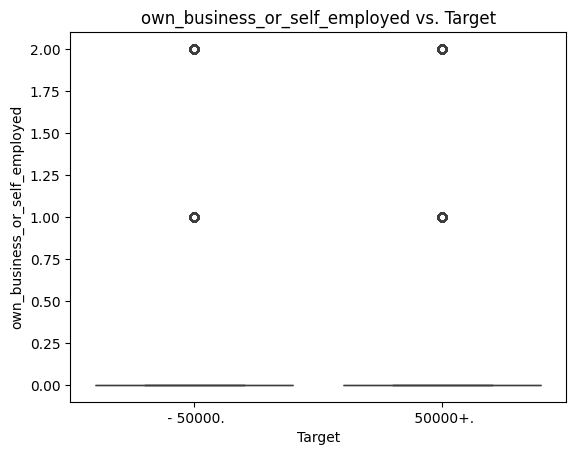

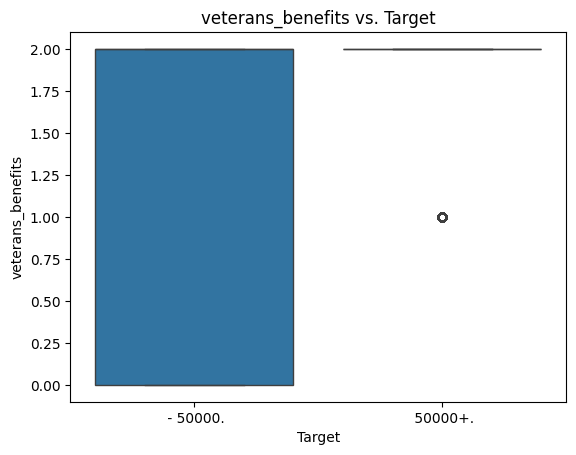

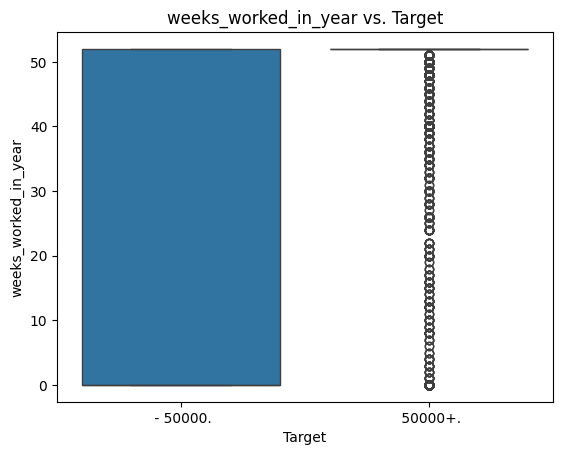

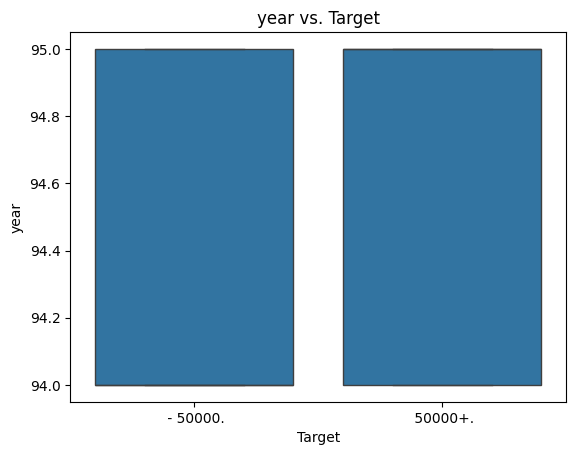

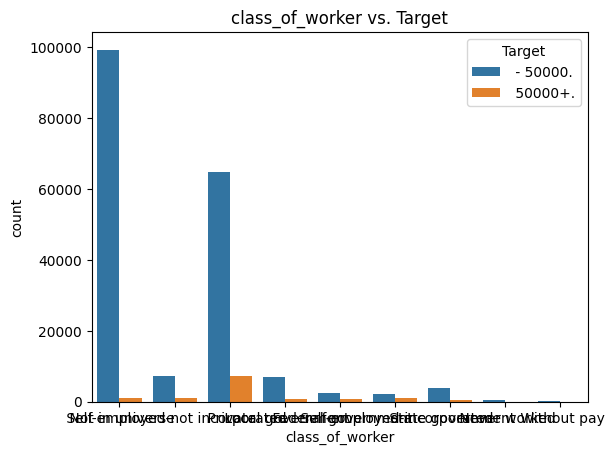

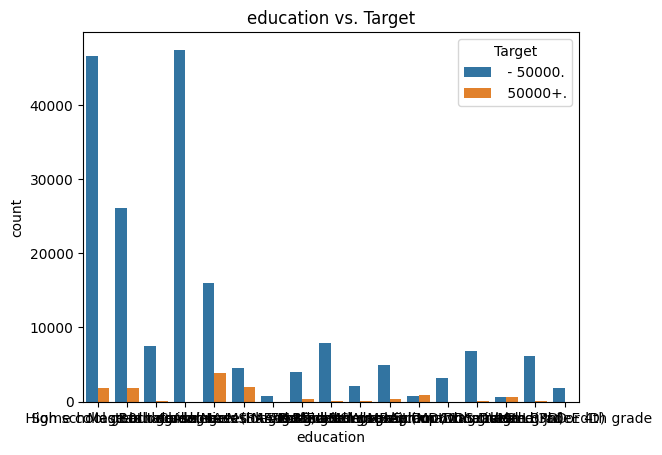

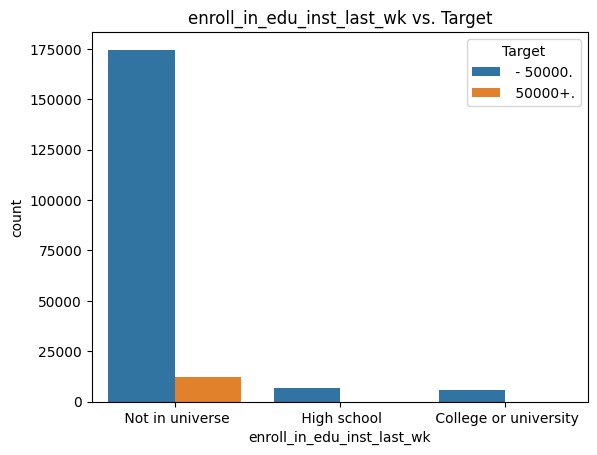

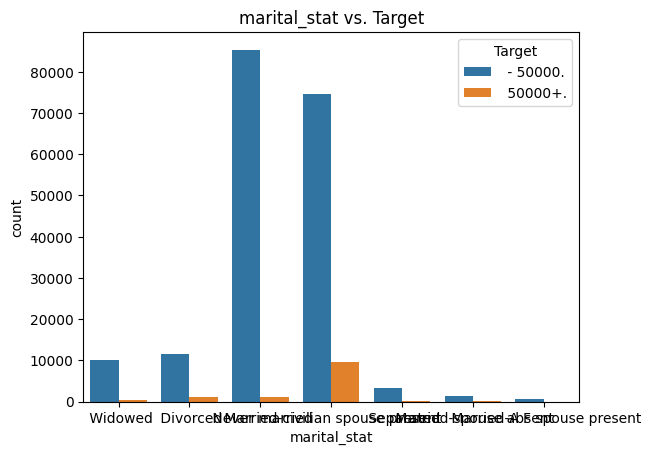

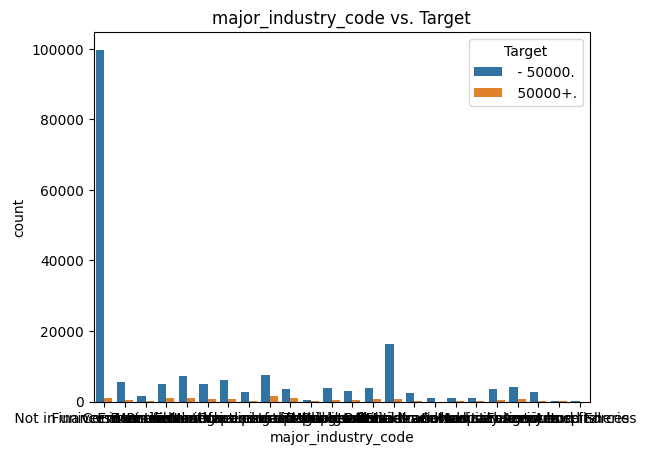

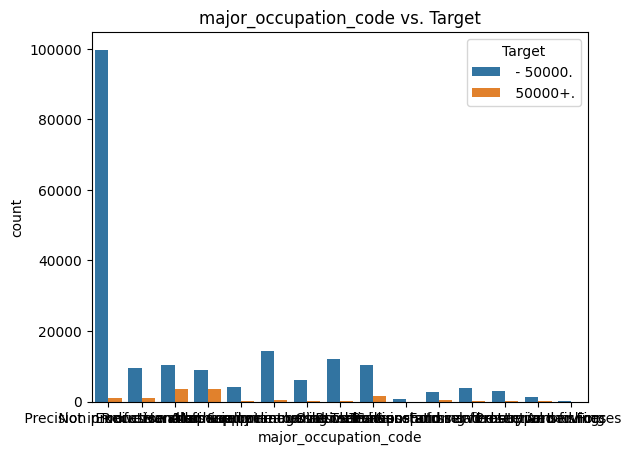

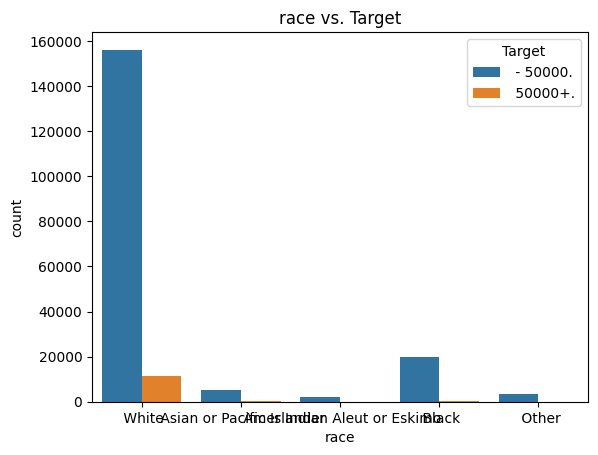

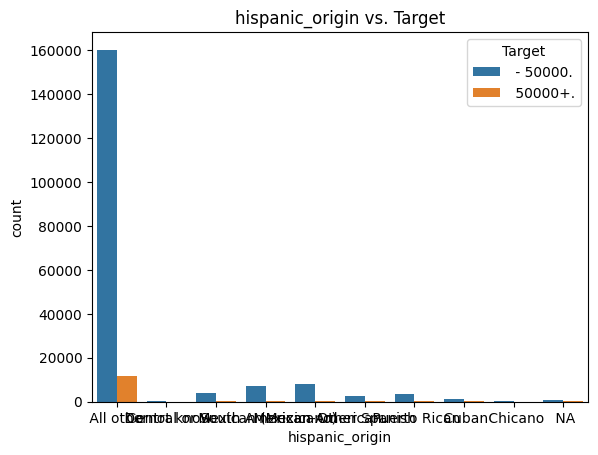

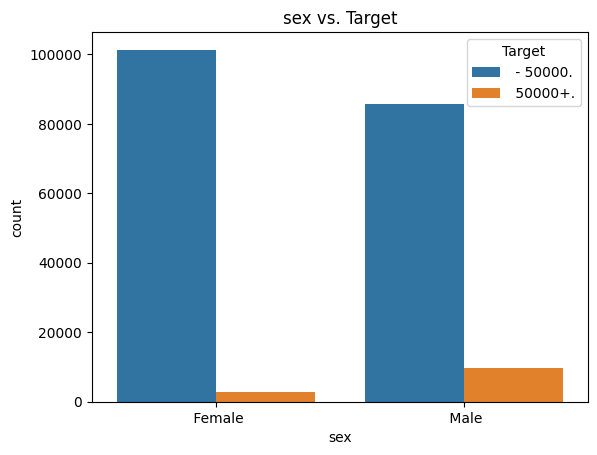

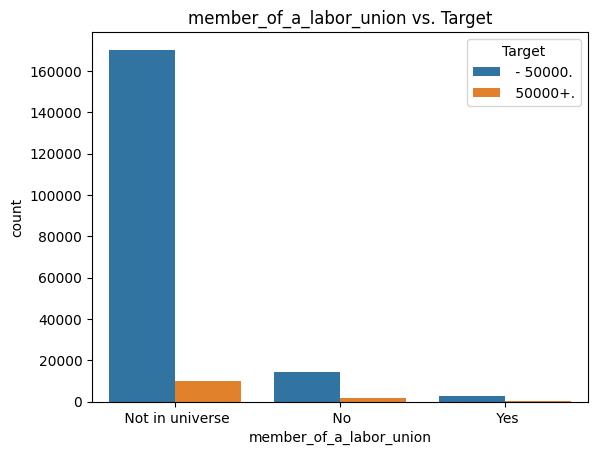

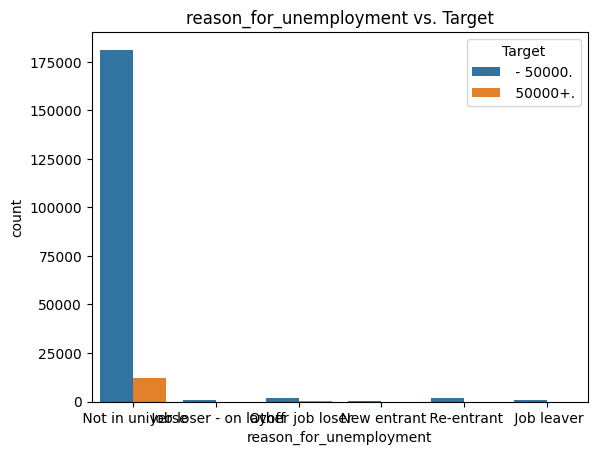

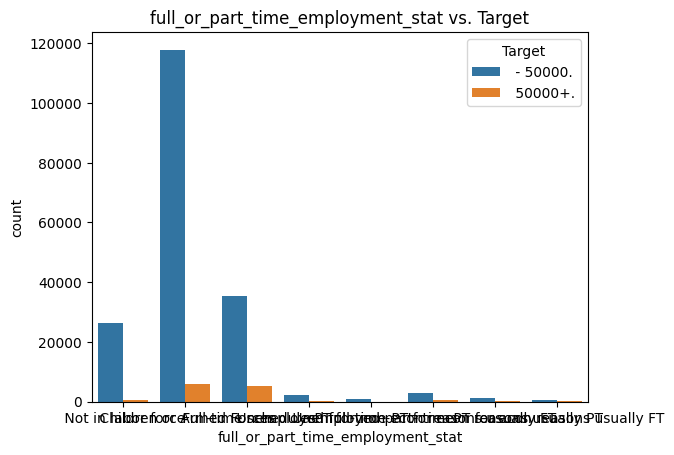

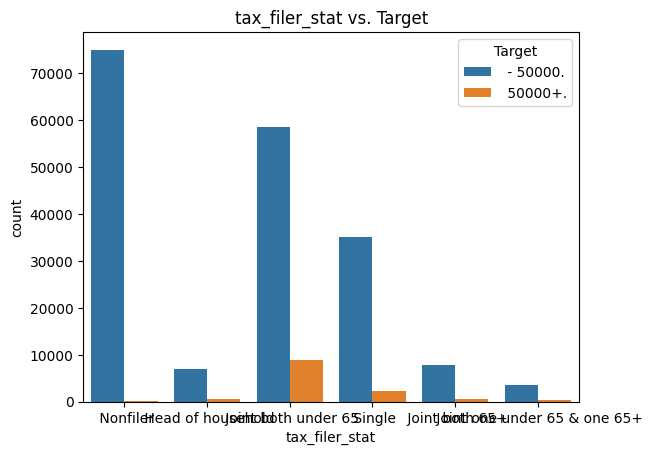

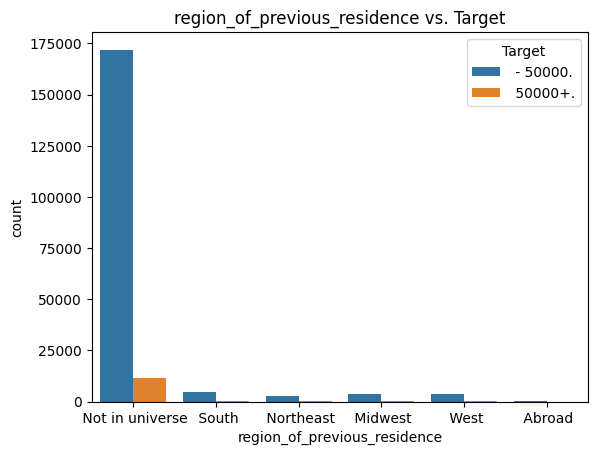

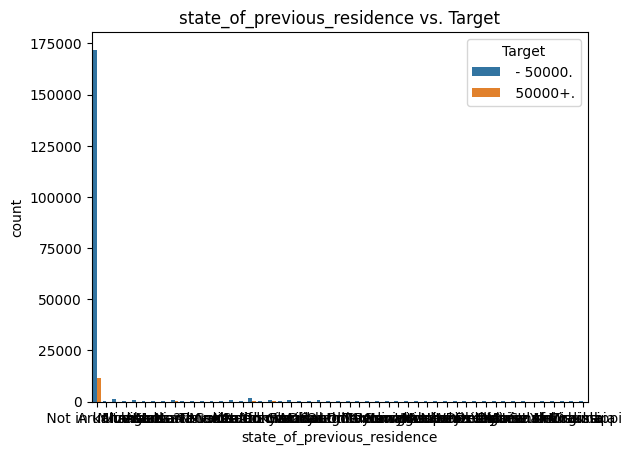

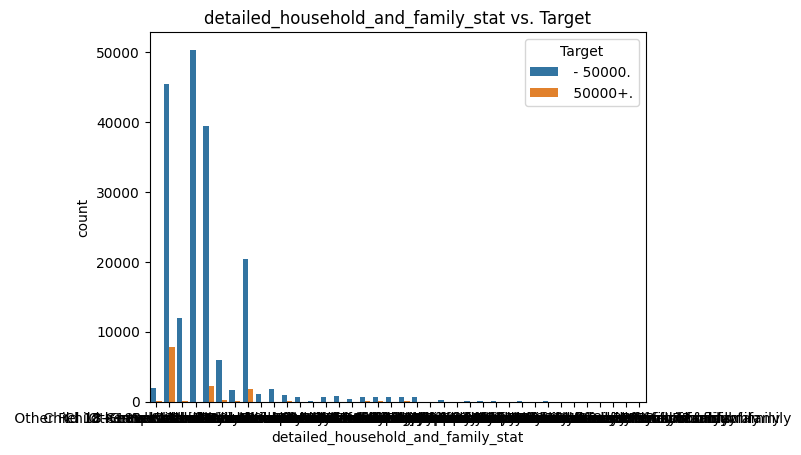

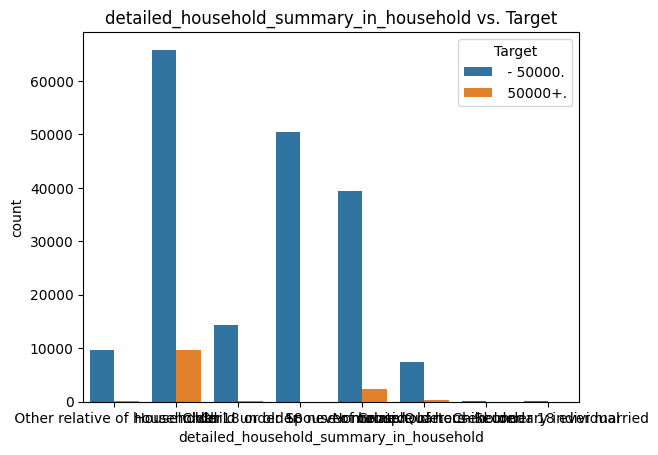

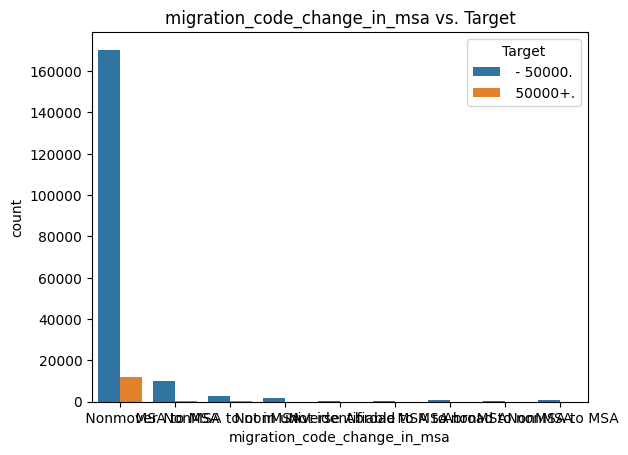

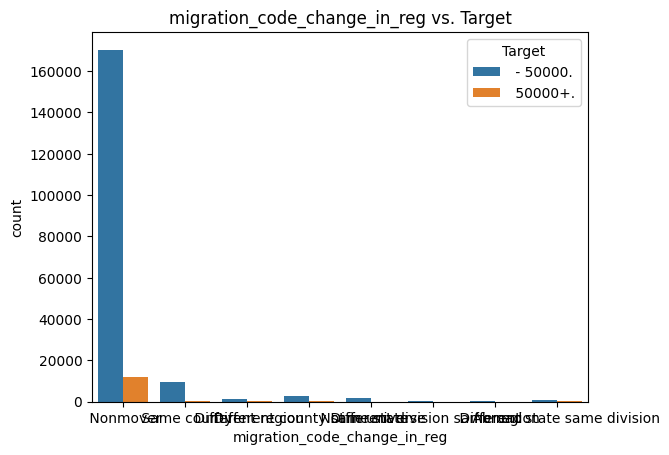

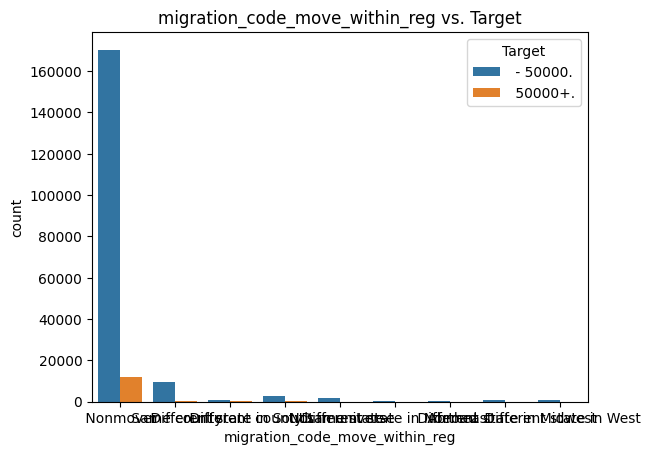

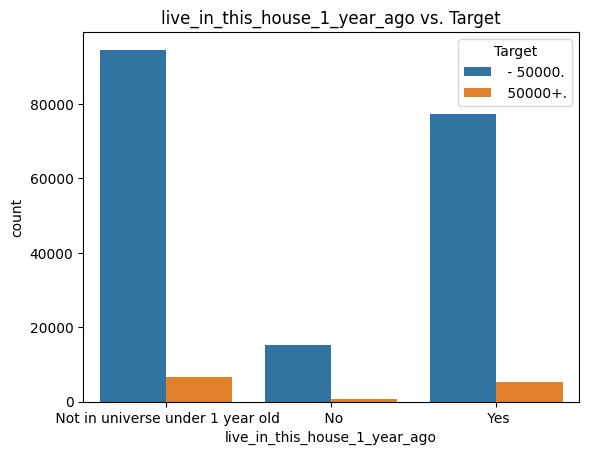

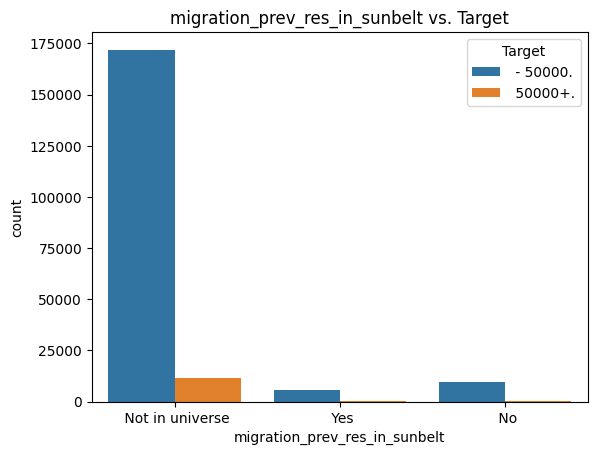

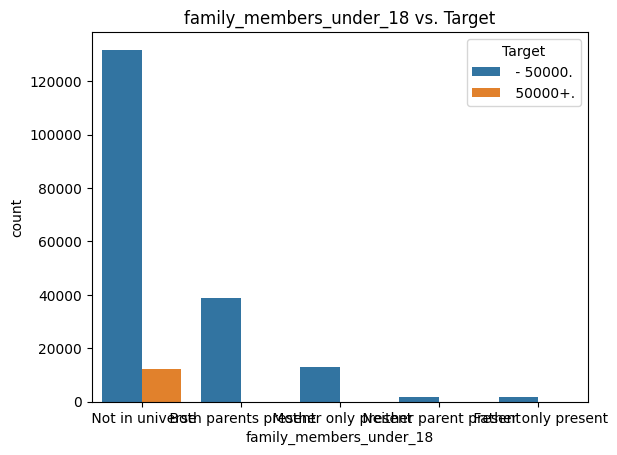

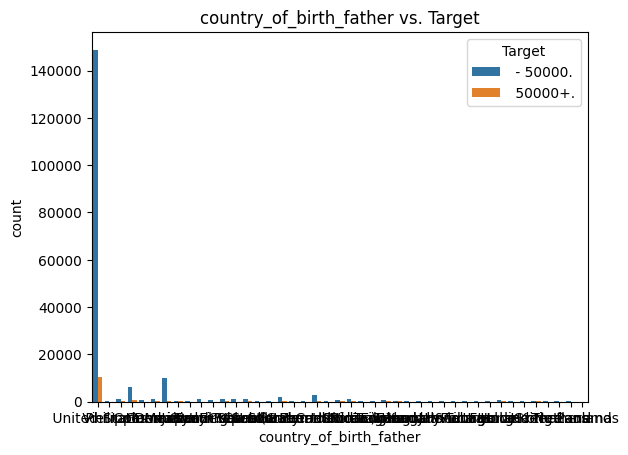

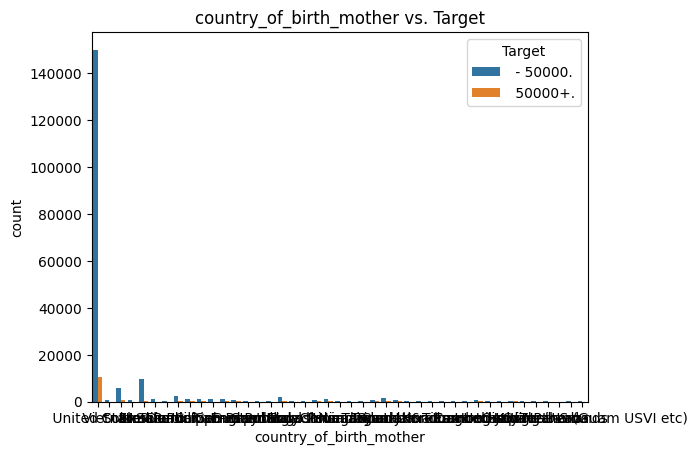

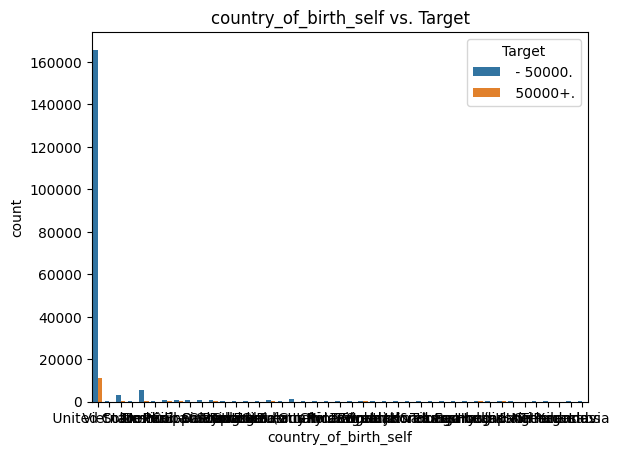

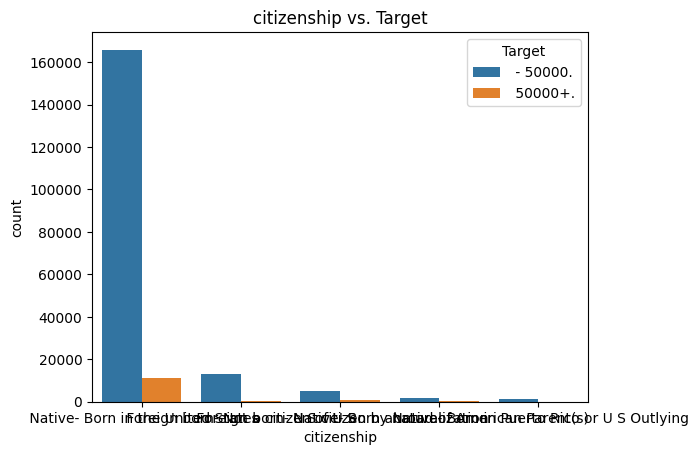

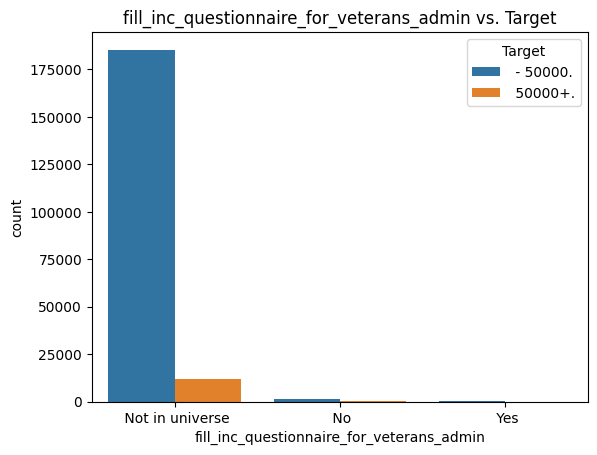

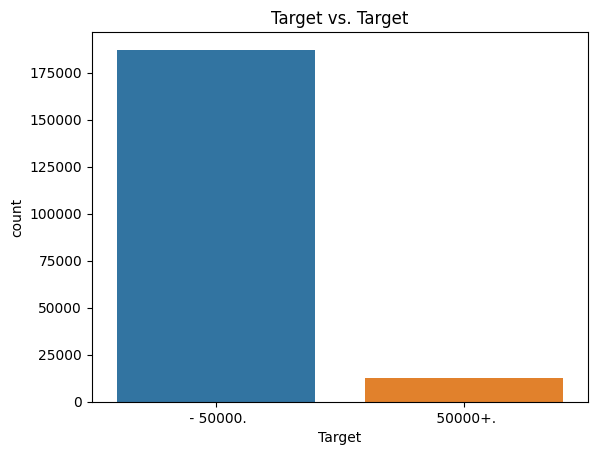

In [102]:
import seaborn as sns

# Box plots for numerical features vs. Target
numerical_features = [col for col in df_income_learn.columns if df_income_learn[col].dtype != 'object']
for col in numerical_features:
    sns.boxplot(x='Target', y=col, data=df_income_learn)
    plt.title(f'{col} vs. Target')
    plt.show()

# Bar plots for categorical features vs. Target
for col in categorical_features:
    sns.countplot(x=col, hue='Target', data=df_income_learn)
    plt.title(f'{col} vs. Target')
    plt.show()


### Multivariate analysis

In [103]:
!pip install seaborn

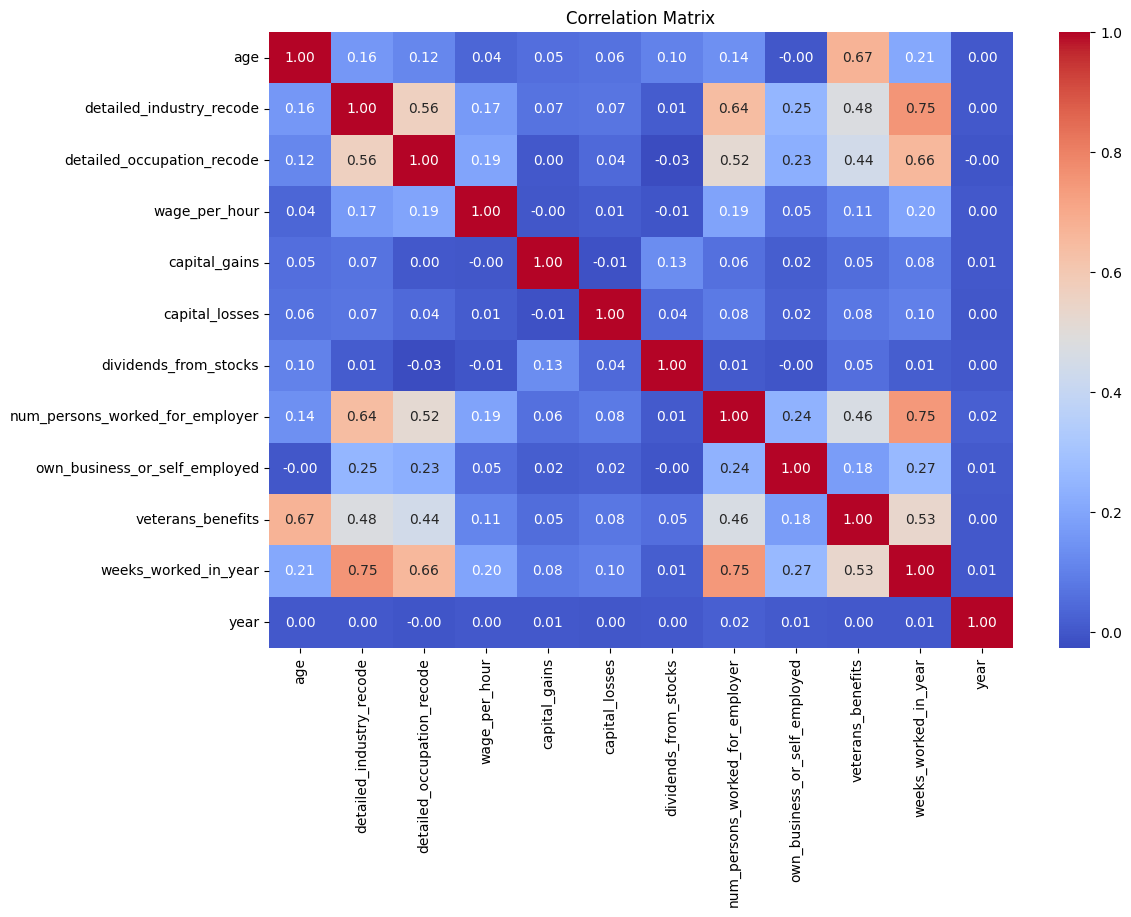

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = df_income_learn.select_dtypes(include=['number'])

# Correlation matrix
corr_matrix = numerical_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [105]:
#Using Chi Square to see what values are correlated or not

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

# Prepare the data
# Filter categorical columns
categorical_cols = df_income_learn.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoders = {}
df_encoded = df_income_learn.copy()

# Encode categorical columns
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_income_learn[col])

# Extract features and target
X = df_encoded.drop(columns='Target')
y = df_encoded['Target']

# Perform Chi-Squared Test
p_values = {}
for col in X.columns:
    contingency_table = pd.crosstab(X[col], y)
    _, p_value, _, _ = chi2_contingency(contingency_table)
    p_values[col] = p_value

# Determine features with p-value > 0.05
not_significant_features = [feature for feature, p in p_values.items() if p > 0.05]

# Output results
print("Features not significantly correlated with 'Target' (p-value > 0.05):")
print(not_significant_features)


Features not significantly correlated with 'Target' (p-value > 0.05):
[]


## Data Transformation

In [106]:
# may try things like normalizations


In [146]:
# Map the target variable to 0 and 1
df_income_learn['Target'] = df_income_learn['Target'].map({' - 50000.': 0, ' 50000+.': 1})

### One hot encoding

In [108]:
import pandas as pd

# Define the degree_order dictionary for ordinal encoding
degree_order = {
    'Children': 0,
    'Less than 1st grade': 1,
    '1st, 2nd, 3rd, or 4th grade': 2,
    '5th or 6th grade': 3,
    '7th and 8th grade': 4,
    '9th grade': 5,
    '10th grade': 6,
    '11th grade': 7,
    '12th grade no diploma': 8,
    'High school graduate': 9,
    'Some college but no degree': 10,
    'Associate\'s degree - academic program': 11,
    'Associate\'s degree - occupational/vocational': 12,
    'Bachelor\'s degree (BA, AB, BS)': 13,
    'Master\'s degree (MA, MS, MEng, MEd, MSW, MBA)': 14,
    'Doctorate degree (PhD, EdD)': 15,
    'Professional school degree (MD, DDS, DVM, LLB, JD)': 16
}

# Strip whitespaces from the education column
df_income_learn['education'] = df_income_learn['education'].str.strip()

# Apply the ordinal mapping
df_income_learn['education_ordinal'] = df_income_learn['education'].map(degree_order)

# Check the first few rows to verify the encoding
print(df_income_learn[['education', 'education_ordinal']].head())

                    education  education_ordinal
0        High school graduate                9.0
1  Some college but no degree               10.0
2                  10th grade                6.0
3                    Children                0.0
4                    Children                0.0


In [147]:
df_income_learn['education'].unique()

array([' High school graduate', ' Some college but no degree',
       ' 10th grade', ' Children', ' Bachelors degree(BA AB BS)',
       ' Masters degree(MA MS MEng MEd MSW MBA)', ' Less than 1st grade',
       ' Associates degree-academic program', ' 7th and 8th grade',
       ' 12th grade no diploma', ' Associates degree-occup /vocational',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 5th or 6th grade',
       ' 11th grade', ' Doctorate degree(PhD EdD)', ' 9th grade',
       ' 1st 2nd 3rd or 4th grade'], dtype=object)

In [112]:
df_income_learn.drop(columns=['education_ordinal'], inplace=True)

In [113]:
df_income_learn.columns

Index(['age', 'class_of_worker', 'detailed_industry_recode',
       'detailed_occupation_recode', 'wage_per_hour',
       'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code',
       'major_occupation_code', 'race', 'hispanic_origin', 'sex',
       'member_of_a_labor_union', 'reason_for_unemployment',
       'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses',
       'dividends_from_stocks', 'tax_filer_stat',
       'region_of_previous_residence', 'state_of_previous_residence',
       'detailed_household_and_family_stat',
       'detailed_household_summary_in_household',
       'migration_code_change_in_msa', 'migration_code_change_in_reg',
       'migration_code_move_within_reg', 'live_in_this_house_1_year_ago',
       'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer',
       'family_members_under_18', 'country_of_birth_father',
       'country_of_birth_mother', 'country_of_birth_self', 'citizenship',
       'own_business_or_self_empl

In [148]:
# May need to come back to this, I might want to change the value of the school to a step wise encoding


categorical_features = [
    "class_of_worker",
    "detailed_industry_recode",
    "detailed_occupation_recode",
    "enroll_in_edu_inst_last_wk",
    "marital_stat",
    "major_industry_code",
    "major_occupation_code",
    "race",
    "hispanic_origin",
    "sex",
    "member_of_a_labor_union",
    "reason_for_unemployment",
    "full_or_part_time_employment_stat",
    "tax_filer_stat",
    "region_of_previous_residence",
    "state_of_previous_residence",
    "detailed_household_and_family_stat",
    "detailed_household_summary_in_household",
    "migration_code_change_in_msa",
    "migration_code_change_in_reg",
    "migration_code_move_within_reg",
    "live_in_this_house_1_year_ago",
    "migration_prev_res_in_sunbelt",
    "family_members_under_18",
    "country_of_birth_father",
    "country_of_birth_mother",
    "country_of_birth_self",
    "citizenship",
    "own_business_or_self_employed",
    "fill_inc_questionnaire_for_veterans_admin",
    "veterans_benefits",
    "education"
]


In [149]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# Define categorical and numeric features
categorical_features = [
    "class_of_worker",
    "detailed_industry_recode",
    "detailed_occupation_recode",
    "enroll_in_edu_inst_last_wk",
    "marital_stat",
    "major_industry_code",
    "major_occupation_code",
    "race",
    "hispanic_origin",
    "sex",
    "member_of_a_labor_union",
    "reason_for_unemployment",
    "full_or_part_time_employment_stat",
    "tax_filer_stat",
    "region_of_previous_residence",
    "state_of_previous_residence",
    "detailed_household_and_family_stat",
    "detailed_household_summary_in_household",
    "migration_code_change_in_msa",
    "migration_code_change_in_reg",
    "migration_code_move_within_reg",
    "live_in_this_house_1_year_ago",
    "migration_prev_res_in_sunbelt",
    "family_members_under_18",
    "country_of_birth_father",
    "country_of_birth_mother",
    "country_of_birth_self",
    "citizenship",
    "own_business_or_self_employed",
    "fill_inc_questionnaire_for_veterans_admin",
    "veterans_benefits",
    "education"
]

numeric_features = [
    "age",
    "wage_per_hour",
    "capital_gains",
    "capital_losses",
    "dividends_from_stocks",
    "num_persons_worked_for_employer",
    "weeks_worked_in_year",
    "year",
    "Target"
]

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'  # Keep other columns as is
)

# Fit the ColumnTransformer on the training data
preprocessor.fit(df_income_learn)

# Fit and transform the training data
X_train_encoded = preprocessor.transform(df_income_learn)

# Get feature names for the encoded columns
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
num_feature_names = numeric_features

# Combine feature names
feature_names = list(cat_feature_names) + num_feature_names

# Debug: Print shapes and lengths
print(f"Shape of encoded data: {X_train_encoded.shape}")
print(f"Number of feature names: {len(feature_names)}")

# Convert the transformed data to DataFrame
df_income_learn_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)

df_income_learn_encoded.head()


Shape of encoded data: (199523, 506)
Number of feature names: 506


class_of_worker_ Federal government  class_of_worker_ Local government  \
0                                  0.0                                0.0   
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  0.0                                0.0   

   class_of_worker_ Never worked  class_of_worker_ Not in universe  \
0                            0.0                               1.0   
1                            0.0                               0.0   
2                            0.0                               1.0   
3                            0.0                               1.0   
4                            0.0                               1.0   

   class_of_worker_ Private  class_of_worker_ Self-employed-incorporated  \
0                       0.0                                          0.0   
1                       0.0                                          0.0   
2                       0.0                                          0.0   
3                       0.0                                          0.0   
4                       0.0                                          0.0   

   class_of_worker_ Self-employed-not incorporated  \
0                                              0.0   
1                                              1.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   class_of_worker_ State government  class_of_worker_ Without pay  \
0                                0.0                           0.0   
1                                0.0                           0.0   
2                                0.0                           0.0   
3                                0.0                           0.0   
4                                0.0                           0.0   

   detailed_industry_recode_0  detailed_industry_recode_1  \
0                         1.0                         0.0   
1                         0.0                         0.0   
2                         1.0                         0.0   
3                         1.0                         0.0   
4                         1.0                         0.0   

   detailed_industry_recode_2  detailed_industry_recode_3  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   detailed_industry_recode_4  detailed_industry_recode_5  \
0                         0.0                         0.0   
1                         1.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   detailed_industry_recode_6  detailed_industry_recode_7  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   detailed_industry_recode_8  detailed_industry_recode_9  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   detailed_industry_recode_10  detailed_industry_recode_11  \
0                 

In [150]:
# # Perform one-hot encoding on the categorical features
# df_income_learn_encoded = pd.get_dummies(df_income_learn, columns=categorical_features)

# # Show the encoded DataFrame
# df_income_learn_encoded.head()

# Needed to create a function to encode the test set

## Feature Engineering

There is no need for feature engineering bcause we are not trying to build a model for inference but for seeing which features are important?

## Oversampling and Undersampling

In [44]:
pip install imbalanced-learn


In [151]:
# Check the balance of the target variables
target_balance = df_income_learn['Target'].value_counts()

# Display the counts of each class
print("Balance of target variables:")
print(target_balance)


target_percentage = df_income_learn['Target'].value_counts(normalize=True) * 100

print("\nPercentage of target variables:")
print(target_percentage)


Balance of target variables:
Target
0    187141
1     12382
Name: count, dtype: int64

Percentage of target variables:
Target
0    93.794199
1     6.205801
Name: proportion, dtype: float64


In [152]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd


X = df_income_learn_encoded.drop(columns=['Target'])  # Features
y = df_income_learn_encoded['Target']  # Target

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)  # or specify a ratio

# Fit and transform the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Combine the resampled data back into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Target'] = y_resampled

# Check the new balance of target variables
print("New balance of target variables:")
print(df_resampled['Target'].value_counts())

print("\nNew percentage of target variables:")
print(df_resampled['Target'].value_counts(normalize=True) * 100)


New balance of target variables:
Target
0.0    12382
1.0    12382
Name: count, dtype: int64

New percentage of target variables:
Target
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


<ipython-input-152-2bbc9bf30194>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['Target'] = y_resampled


In [153]:
df_income_learn_encoded = df_resampled.copy()

## Modelling

### Test Data Set

In [158]:
df_income_test = pd.read_csv('census_income_test.csv', header = None, names = columns)

In [159]:
df_income_test.head(5)

age                  class_of_worker  detailed_industry_recode  \
0   38                          Private                         6   
1   44   Self-employed-not incorporated                        37   
2    2                  Not in universe                         0   
3   35                          Private                        29   
4   49                          Private                         4   

   detailed_occupation_recode                             education  \
0                          36              1st 2nd 3rd or 4th grade   
1                          12   Associates degree-occup /vocational   
2                           0                              Children   
3                           3                  High school graduate   
4                          34                  High school graduate   

   wage_per_hour enroll_in_edu_inst_last_wk                      marital_stat  \
0              0            Not in universe   Married-civilian spouse present   
1              0            Not in universe   Married-civilian spouse present   
2              0            Not in universe                     Never married   
3              0            Not in universe                          Divorced   
4              0            Not in universe                          Divorced   

             major_industry_code                   major_occupation_code  \
0    Manufacturing-durable goods   Machine operators assmblrs & inspctrs   
1   Business and repair services                  Professional specialty   
2    Not in universe or children                         Not in universe   
3                 Transportation          Executive admin and managerial   
4                   Construction     Precision production craft & repair   

     race      hispanic_origin      sex member_of_a_labor_union  \
0   White   Mexican (Mexicano)   Female         Not in universe   
1   White            All other   Female         Not in universe   
2   White     Mexican-American     Male         Not in universe   
3   White            All other   Female         Not in universe   
4   White            All other     Male         Not in universe   

  reason_for_unemployment full_or_part_time_employment_stat  capital_gains  \
0         Not in universe               Full-time schedules              0   
1         Not in universe    PT for econ reasons usually PT              0   
2         Not in universe          Children or Armed Forces              0   
3         Not in universe          Children or Armed Forces              0   
4         Not in universe               Full-time schedules              0   

   capital_losses  dividends_from_stocks                 tax_filer_stat  \
0               0                      0   Joint one under 65 & one 65+   
1               0                   2500            Joint both under 65   
2               0                      0                       Nonfiler   
3               0                      0              Head of household   
4               0                      0                         Single   

  region_of_previous_residence state_of_previous_residence  \
0              Not in universe             Not in universe   
1              Not in universe             Not in universe   
2              Not in universe             Not in universe   
3              Not in universe             Not in universe   
4              Not in universe             Not in universe   

       detailed_household_and_family_stat  \
0                   Spouse of householder   
1                   Spouse of householder   
2   Child <18 never marr not in subfamily   
3                             Householder   
4                    Secondary individual   

  detailed_household_summary_in_household  instance_weight  \
0                   Spouse of householder          1032.38   
1                   Spouse of householder          1462.33   
2            Child under 18 never married          1601.75   
3 

In [160]:
df_income_test['Target'] = df_income_test['Target'].map({' - 50000.': 0, ' 50000+.': 1})

In [157]:
# Strip whitespaces from the education column
df_income_test['education'] = df_income_test['education'].str.strip()

# Apply the ordinal mapping
df_income_test['education_ordinal'] = df_income_test['education'].map(degree_order)

# Check the first few rows to verify the encoding
print(df_income_test[['education', 'education_ordinal']].head())

                             education  education_ordinal
0             1st 2nd 3rd or 4th grade                NaN
1  Associates degree-occup /vocational                NaN
2                             Children                0.0
3                 High school graduate                9.0
4                 High school graduate                9.0


In [52]:
df_income_test.drop(columns=['education'], inplace=True)

In [53]:
df_income_test['education_ordinal'].unique()

array([nan,  0.,  9.,  6., 10.,  4.,  5.,  8.,  1.,  7.,  3.])

In [54]:
# # Perform one-hot encoding on the categorical features
# df_income_test_encoded = pd.get_dummies(df_income_test, columns=categorical_features)

# # Show the encoded DataFrame
# df_income_test_encoded.head()

In [161]:
# Fit and transform the training data
X_test_encoded = preprocessor.transform(df_income_test)

# Get feature names for the encoded columns
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()
num_feature_names = numeric_features

# Combine feature names
feature_names = list(cat_feature_names) + num_feature_names

# Debug: Print shapes and lengths
print(f"Shape of encoded data: {X_test_encoded.shape}")
print(f"Number of feature names: {len(feature_names)}")

# Convert the transformed data to DataFrame
df_income_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names)

df_income_test_encoded.head()

Shape of encoded data: (99762, 506)
Number of feature names: 506


class_of_worker_ Federal government  class_of_worker_ Local government  \
0                                  0.0                                0.0   
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  0.0                                0.0   

   class_of_worker_ Never worked  class_of_worker_ Not in universe  \
0                            0.0                               0.0   
1                            0.0                               0.0   
2                            0.0                               1.0   
3                            0.0                               0.0   
4                            0.0                               0.0   

   class_of_worker_ Private  class_of_worker_ Self-employed-incorporated  \
0                       1.0                                          0.0   
1                       0.0                                          0.0   
2                       0.0                                          0.0   
3                       1.0                                          0.0   
4                       1.0                                          0.0   

   class_of_worker_ Self-employed-not incorporated  \
0                                              0.0   
1                                              1.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   class_of_worker_ State government  class_of_worker_ Without pay  \
0                                0.0                           0.0   
1                                0.0                           0.0   
2                                0.0                           0.0   
3                                0.0                           0.0   
4                                0.0                           0.0   

   detailed_industry_recode_0  detailed_industry_recode_1  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         1.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   detailed_industry_recode_2  detailed_industry_recode_3  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   detailed_industry_recode_4  detailed_industry_recode_5  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         1.0                         0.0   

   detailed_industry_recode_6  detailed_industry_recode_7  \
0                         1.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   detailed_industry_recode_8  detailed_industry_recode_9  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   detailed_industry_recode_10  detailed_industry_recode_11  \
0                 

In [162]:
df_income_test['Target']

0        0
1        0
2        0
3        0
4        0
        ..
99757    0
99758    0
99759    0
99760    0
99761    0
Name: Target, Length: 99762, dtype: int64

### Nested Cross Validation

In [172]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris  # For demonstration; replace with your dataset
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train = df_income_learn_encoded.drop('Target', axis=1)
y_train = df_income_learn_encoded['Target']
X_test = df_income_test_encoded.drop('Target', axis=1)
y_test = df_income_test_encoded['Target']


# Define models and parameter grids
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=100, solver='liblinear', class_weight='balanced'))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier())
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', GradientBoostingClassifier())
    ]),
    'SVC': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC(class_weight='balanced'))
    ])
}

param_grids = {
    'Logistic Regression': {
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'clf__n_estimators': [50, 100],
        'clf__max_depth': [None, 10]
    },
    'Gradient Boosting': {
        'clf__n_estimators': [50, 100],
        'clf__learning_rate': [0.01, 0.1]
    },
    'SVC': {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf']
    }
}

# Set up nested cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

def nested_cv(X, y, models, param_grids, outer_cv, inner_cv):
    results = {}

    for model_name, model in models.items():
        print(f"Processing {model_name}...")

        grid_search = GridSearchCV(model, param_grids[model_name], cv=inner_cv, scoring='accuracy', n_jobs=-1)
        fold_scores = []

        for train_index, test_index in outer_cv.split(X):
            X_train_outer, X_test_outer = X.iloc[train_index], X.iloc[test_index]
            y_train_outer, y_test_outer = y.iloc[train_index], y.iloc[test_index]

            # Fit and evaluate the model
            grid_search.fit(X_train_outer, y_train_outer)
            best_model = grid_search.best_estimator_
            score = best_model.score(X_test_outer, y_test_outer)
            fold_scores.append(score)
            print(f'Fold accuracy: {score:.4f}')

        mean_score = np.mean(fold_scores)
        results[model_name] = mean_score
        print(f"Mean accuracy for {model_name}: {mean_score:.4f}")

    return results

# Execute nested cross-validation for all models
results = nested_cv(X_train, y_train, models, param_grids, outer_cv, inner_cv)
print("Final results:", results)


Processing Logistic Regression...
Fold accuracy: 0.8714
Fold accuracy: 0.8726
Fold accuracy: 0.8702
Fold accuracy: 0.8726
Fold accuracy: 0.8780
Mean accuracy for Logistic Regression: 0.8730
Processing Random Forest...
Fold accuracy: 0.8635
Fold accuracy: 0.8698
Fold accuracy: 0.8599
Fold accuracy: 0.8746
Fold accuracy: 0.8764
Mean accuracy for Random Forest: 0.8688
Processing Gradient Boosting...
Fold accuracy: 0.8732
Fold accuracy: 0.8734
Fold accuracy: 0.8706
Fold accuracy: 0.8714
Fold accuracy: 0.8798
Mean accuracy for Gradient Boosting: 0.8737
Processing SVC...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fold accuracy: 0.8655


KeyboardInterrupt: 

In [163]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# # Define models to evaluate
# models = {
#     'Logistic Regression': Pipeline([
#         ('preprocessor', preprocessor),
#         ('clf', LogisticRegression(max_iter=100, solver='liblinear', class_weight='balanced'))
#     ]),
#     'Random Forest': Pipeline([
#         ('preprocessor', preprocessor),
#         ('clf', RandomForestClassifier(class_weight='balanced'))
#     ]),
#     'Gradient Boosting': Pipeline([
#         ('preprocessor', preprocessor),
#         ('clf', GradientBoostingClassifier())
#     ]),
#     'SVC': Pipeline([
#         ('preprocessor', preprocessor),
#         ('clf', SVC(class_weight='balanced'))
#     ])
# }

# # Define parameter grids for each model
# param_grids = {
#     'Logistic Regression': {
#         'clf__C': [0.1, 1, 10],
#         'clf__penalty': ['l1', 'l2']
#     },
#     'Random Forest': {
#         'clf__n_estimators': [50, 100],
#         'clf__max_depth': [None, 10]
#     },
#     'Gradient Boosting': {
#         'clf__n_estimators': [50, 100],
#         'clf__learning_rate': [0.01, 0.1]
#     },
#     'SVC': {
#         'clf__C': [0.1, 1, 10],
#         'clf__kernel': ['linear', 'rbf']
#     }
# }

# # Split data into features and target
# X_train = df_income_learn_encoded.drop('Target', axis=1)
# y_train = df_income_learn_encoded['Target']
# X_test = df_income_test_encoded.drop('Target', axis=1)
# y_test = df_income_test_encoded['Target']



In [ ]:
# # Perform nested cross-validation
# outer_cv = KFold(n_splits=3, shuffle=True, random_state=42)
# inner_cv = KFold(n_splits=2, shuffle=True, random_state=42)

# for model_name, model in models.items():
#     print(f"Processing {model_name}...")

#     grid_search = GridSearchCV(model, param_grids[model_name], cv=inner_cv, scoring='roc_auc', n_jobs=-1)
#     nested_score = cross_val_score(grid_search, X_train, y_train, cv=outer_cv, scoring='roc_auc')
#     print(f"Mean ROC AUC for {model_name}: {nested_score.mean()}")


In [167]:
def compare_dataframes_detailed(df1, df2):
    columns_df1 = df1.columns
    columns_df2 = df2.columns

    # Check if the columns match
    if set(columns_df1) != set(columns_df2):
        print("Column names differ between X_train and X_test.")
        compare_dataframes(df1, df2)
    else:
        print("Column names are identical.")

    # Check data types
    for col in columns_df1:
        if col in columns_df2:
            if df1[col].dtype != df2[col].dtype:
                print(f"Column '{col}' has different data types: {df1[col].dtype} (X_train) vs {df2[col].dtype} (X_test)")
        else:
            print(f"Column '{col}' missing in X_test")

    for col in columns_df2:
        if col not in columns_df1:
            print(f"Column '{col}' missing in X_train")

# Call the detailed comparison function
compare_dataframes_detailed(X_train, X_test)


Column names are identical.


In [ ]:

# Loop through each column and print unique values
for column in X_train.columns:
    unique_values =  X_train[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()  # Add a blank line for better readability

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# # Define models to evaluate
# models = {
#     'Logistic Regression': Pipeline([
#         ('scaler', StandardScaler()),
#         ('clf', LogisticRegression(max_iter=100, solver='liblinear', class_weight='balanced'))
#     ]),
#     'Random Forest': Pipeline([
#         ('scaler', StandardScaler()),
#         ('clf', RandomForestClassifier(class_weight='balanced'))
#     ]),
#     'Gradient Boosting': Pipeline([
#         ('scaler', StandardScaler()),
#         ('clf', GradientBoostingClassifier())
#     ]),
#     'SVC': Pipeline([
#         ('scaler', StandardScaler()),
#         ('clf', SVC(class_weight='balanced'))
#     ])
# }

# # Define parameter grids for each model
# param_grids = {
#     'Logistic Regression': {
#         'clf__C': [0.1, 1, 10],
#         'clf__penalty': ['l1', 'l2']
#     },
#     'Random Forest': {
#         'clf__n_estimators': [50, 100],
#         'clf__max_depth': [None, 10]
#     },
#     'Gradient Boosting': {
#         'clf__n_estimators': [50, 100],
#         'clf__learning_rate': [0.01, 0.1]
#     },
#     'SVC': {
#         'clf__C': [0.1, 1, 10],
#         'clf__kernel': ['linear', 'rbf']
#     }
# }

# # Load your data
# # Assuming df_income_learn_encoded and df_income_test_encoded are your original large datasets

# # Reduce the size of the datasets to 5% of the original size
# df_income_learn_encoded_sampled = df_income_learn_encoded.sample(frac=0.05, random_state=42)
# df_income_test_encoded_sampled = df_income_test_encoded.sample(frac=0.05, random_state=42)

# # Split features and target
# X_train = df_income_learn_encoded_sampled.drop('Target', axis=1)
# y_train = df_income_learn_encoded_sampled['Target']

# X_test = df_income_test_encoded_sampled.drop('Target', axis=1)
# y_test = df_income_test_encoded_sampled['Target']

# # Perform nested cross-validation
# from sklearn.model_selection import KFold

# outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
# inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

# for model_name, model in models.items():
#     print(f"Processing {model_name}...")

#     grid_search = GridSearchCV(model, param_grids[model_name], cv=inner_cv, scoring='roc_auc', n_jobs=-1)
#     nested_score = cross_val_score(grid_search, X_train, y_train, cv=outer_cv, scoring='roc_auc')
#     print(f"Mean ROC AUC for {model_name}: {nested_score.mean()}")


### Bayesian Hyperparmeter Optimization

In [173]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.1 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna.samplers import TPESampler
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer  # For demonstration; replace with your dataset
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train = df_income_learn_encoded.drop('Target', axis=1)
y_train = df_income_learn_encoded['Target']
X_test = df_income_test_encoded.drop('Target', axis=1)
y_test = df_income_test_encoded['Target']


def objective(trial):
    # Define the parameter space
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }

    # Create the GradientBoosting model with suggested parameters
    model = GradientBoostingClassifier(**param, random_state=42)

    # Cross-validation
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=outer_cv, scoring='roc_auc', n_jobs=-1)

    # Return the mean score as the objective value
    return score.mean()

# Create Optuna study
study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(objective, n_trials=50)

# Print best parameters and score
print("Best parameters found:")
print(study.best_params)
print("Best score found:")
print(study.best_value)


[I 2024-07-26 03:00:06,183] A new study created in memory with name: no-name-b0b70393-541c-4ab7-8d76-e24c16a360db
<ipython-input-175-596be91feab8>:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
<ipython-input-175-596be91feab8>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
[I 2024-07-26 03:00:26,239] Trial 0 finished with value: 0.9457126561356504 and parameters: {'n_estimators': 195, 'learning_rate': 0.0551219705040707, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 5, 'subsample': 0.6045007284909863, 'max_features': 'log2'}. Best is trial 

In [53]:
?

[I 2024-07-25 14:14:06,954] A new study created in memory with name: no-name-cea1a2d5-b9b4-4069-bc3c-bdd7024e2da0
<ipython-input-53-12172bfea0ad>:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 1)
[I 2024-07-25 14:14:16,762] Trial 0 finished with value: 0.8029706938566115 and parameters: {'model': 'Gradient Boosting', 'n_estimators': 85, 'learning_rate': 0.8435809407762326}. Best is trial 0 with value: 0.8029706938566115.
<ipython-input-53-12172bfea0ad>:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 1)
[I 2024-07-25 14:14:24,316] Trial 1 f

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


In [ ]:

# def objective(trial):
#     model_name = trial.suggest_categorical('model', ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVC'])

#     if model_name == 'Logistic Regression':
#         penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
#         C = trial.suggest_float('C', 0.1, 10, log=True)
#         solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
#         model = Pipeline([
#             ('scaler', StandardScaler()),
#             ('clf', LogisticRegression(penalty=penalty, C=C, solver=solver))
#         ])

#     elif model_name == 'Random Forest':
#         n_estimators = trial.suggest_int('n_estimators', 50, 200)
#         max_depth = trial.suggest_categorical('max_depth', [None, 10, 20])
#         model = Pipeline([
#             ('scaler', StandardScaler()),
#             ('clf', RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth))
#         ])

#     elif model_name == 'Gradient Boosting':
#         n_estimators = trial.suggest_int('n_estimators', 50, 200)
#         learning_rate = trial.suggest_float('learning_rate', 0.01, 1, log=True)
#         model = Pipeline([
#             ('scaler', StandardScaler()),
#             ('clf', GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate))
#         ])

#     elif model_name == 'SVC':
#         C = trial.suggest_float('C', 0.1, 10, log=True)
#         kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
#         model = Pipeline([
#             ('scaler', StandardScaler()),
#             ('clf', SVC(C=C, kernel=kernel, probability=True))
#         ])

#     # Evaluate the model
#     score = cross_val_score(model, X_train_small, y_train_small, cv=5, scoring='roc_auc').mean()
#     return score

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# print(f"Best parameters: {study.best_params}")
# print(f"Best ROC AUC score: {study.best_value}")


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import roc_auc_score, classification_report

# # Load your data
# # df_income_learn_encoded = ... (your DataFrame)
# X_train = df_income_learn_encoded.drop('Target', axis=1)
# y_train = df_income_learn_encoded['Target']

# # For the test now
# X_test = df_income_test_encoded.drop('Target', axis=1)
# y_test = df_income_test_encoded['Target']

# # Define the Decision Tree pipeline
# model = Pipeline([
#     ('scaler', StandardScaler()),
#     ('clf', DecisionTreeClassifier())
# ])

# # Define parameter grid for the Decision Tree
# param_grid = {
#     'clf__max_depth': [None, 5, 10, 15, 20],
#     'clf__min_samples_split': [2, 10, 20],
#     'clf__min_samples_leaf': [1, 5, 10]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best model from grid search
# best_model = grid_search.best_estimator_

# # Evaluate the best model on the test set
# y_pred = best_model.predict(X_test)
# y_prob = best_model.predict_proba(X_test)[:, 1]

# # Evaluate the model
# print("Test ROC AUC:", roc_auc_score(y_test, y_prob))
# print("Classification Report:\n", classification_report(y_test, y_pred))

# # Get feature importances
# feature_importances = best_model.named_steps['clf'].feature_importances_
# features = X_train.columns

# # Create a DataFrame for feature importances
# feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# print("Feature Importances:\n", feature_importances_df)


In [ ]:
# import pandas as pd
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score

# # Assume df_income_learn_encoded and df_income_test_encoded are your encoded dataframes
# # Ensure they have the same columns
# common_columns = df_income_learn_encoded.columns.intersection(df_income_test_encoded.columns)
# df_income_learn_encoded = df_income_learn_encoded[common_columns]
# df_income_test_encoded = df_income_test_encoded[common_columns]

# # Split data into features and target
# X_train = df_income_learn_encoded.drop('Target', axis=1)
# y_train = df_income_learn_encoded['Target']
# X_test = df_income_test_encoded.drop('Target', axis=1)
# y_test = df_income_test_encoded['Target']

# # Reduce the dataset size for faster execution
# X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.95, random_state=42)
# X_test_small, _, y_test_small, _ = train_test_split(X_test, y_test, test_size=0.95, random_state=42)

# # Initialize the Decision Tree model
# model = DecisionTreeClassifier(random_state=42)

# # Train the model
# model.fit(X_train_small, y_train_small)

# # Make predictions
# y_pred = model.predict(X_test_small)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_test_small, y_pred))
# print("Classification Report:\n", classification_report(y_test_small, y_pred))


# # Get feature importances
# importances = model.feature_importances_
# feature_names = X_train_small.columns

# # Create a DataFrame for the feature importances
# feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# print("Feature Importances:\n", feature_importances_df)


### Model Training and evaluation

In [ ]:
# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature importance
feature_importances = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

# Best model from Optuna (replace with your actual best model)
best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=100, max_depth=20))
])

best_model.fit(X_train_small, y_train_small)
y_pred = best_model.predict(X_train_small)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_train_small, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train_small, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1695
         1.0       1.00      0.92      0.96       117

    accuracy                           1.00      1812
   macro avg       1.00      0.96      0.98      1812
weighted avg       1.00      1.00      0.99      1812

Confusion Matrix:
[[1695    0]
 [   9  108]]


In [65]:
X_test_small.head()

age  wage_per_hour  capital_gains  capital_losses  \
81471   49              0              0               0   
76674   13              0              0               0   
17374   28              0              0            2042   
76502   27              0              0               0   
96783   37              0              0               0   

       dividends_from_stocks  instance_weight  \
81471                      0           965.19   
76674                      0          1693.93   
17374                      0          1587.48   
76502                      0          1162.93   
96783                      0           305.43   

       num_persons_worked_for_employer  weeks_worked_in_year  year  \
81471                                1                    26    94   
76674                                0                     0    94   
17374                                0                     0    95   
76502                                4                    15    94   
96783                                1                    52    95   

       class_of_worker_ Federal government  class_of_worker_ Local government  \
81471                                False                              False   
76674                                False                              False   
17374                                False                              False   
76502                                False                              False   
96783                                False                              False   

       class_of_worker_ Never worked  class_of_worker_ Not in universe  \
81471                          False                             False   
76674                          False                              True   
17374                          False                              True   
76502                          False                             False   
96783                          False                             False   

       class_of_worker_ Private  class_of_worker_ Self-employed-incorporated  \
81471                      True                                        False   
76674                     False                                        False   
17374                     False                                        False   
76502                      True                                        False   
96783                     False                                        False   

       class_of_worker_ Self-employed-not incorporated  \
81471                                            False   
76674                                            False   
17374                                            False   
76502                                            False   
96783                                             True   

       class_of_worker_ State government  class_of_worker_ Without pay  \
81471                              False                         False   
76674                              False                         False   
17374                              False                         False   
76502                              False                         False   
96783                              False                         False   

       detailed_industry_recode_0  detailed_industry_recode_1  \
81471                       False                       False   
76674                        True                       False   
17374                        True                       False   
76502                       False                       False   
96783                       False                       False   

       detailed_industry_recode_2  detailed_industry_recode_3  \
81471                       False                       False   
76674                       False                       False   
17374                       False                       False   
76502                       False                       False   
96783  

### Feature Importance

You need to come back to this to use the test set to solve the problem

In [66]:
importances = best_model.named_steps['clf'].feature_importances_
feature_names = X_train_small.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
                                               Feature  Importance
4                                dividends_from_stocks    0.059248
0                                                  age    0.054323
2                                        capital_gains    0.043044
5                                      instance_weight    0.041567
6                      num_persons_worked_for_employer    0.025534
..                                                 ...         ...
402           country_of_birth_father_ Trinadad&Tobago    0.000000
401                  country_of_birth_father_ Thailand    0.000000
290  detailed_household_and_family_stat_ Grandchild...    0.000000
291  detailed_household_and_family_stat_ Grandchild...    0.000000
253             state_of_previous_residence_ Minnesota    0.000000

[506 rows x 2 columns]


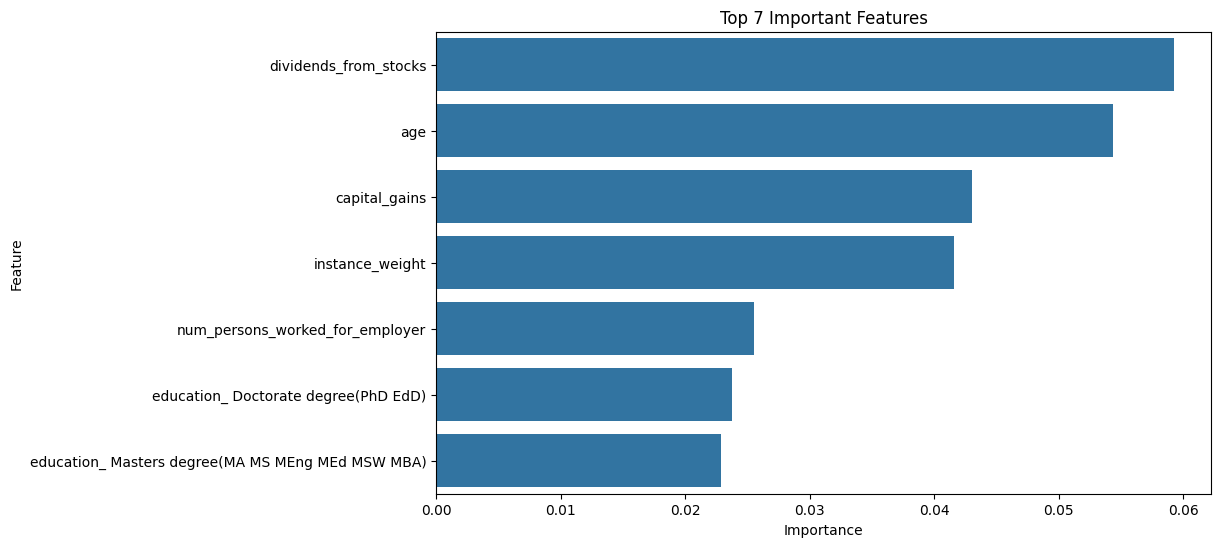

In [67]:
# prompt: from the previous cell I want to generate the 7 most important features in a bar chart

import matplotlib.pyplot as plt
# Select the top 7 features
top_7_features = feature_importance_df.head(7)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_7_features)
plt.title('Top 7 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
